# Подготовка данных

In [1]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_27232/3738330455.py:2: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [3]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [5]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [6]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [7]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [8]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [10]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
# columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']
columns_to_preserve = []
def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [12]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previous_stroke_tia', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'twostent_technique', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_dia

In [13]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [15]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [17]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [18]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [19]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [20]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [22]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.541718,172.066825,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [25]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [26]:
X_train = process_ohe(X_train, categorical, ohe)
X_test = process_ohe(X_test, categorical, ohe)
X_val = process_ohe(X_val, categorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_number_bif_3.0,stent_number_bif_4.0,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0
0,41.0,0.0,100.000000,177.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.0,1.0,81.000000,172.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,55.0,1.0,87.541718,172.066825,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,79.0,0.0,61.000000,160.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,61.0,1.0,84.000000,179.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,111.000000,159.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1222,57.0,0.0,96.000000,178.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1223,63.0,0.0,80.000000,162.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1224,75.0,0.0,165.000000,71.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [28]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,minor_criteria,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,side_diametr,major_lm,main_predilatation,mi_history
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,1.0,11.0,0.0,1.0,0.0,0.0,2.4,0.0,0.0,1.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,0.0,18.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,2.0,33.0,1.0,0.0,1.0,0.0,2.4,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,3.0,38.0,0.0,0.0,0.0,0.0,3.1,0.0,1.0,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,2.0,28.0,1.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,0.0,32.0,0.0,1.0,0.0,0.0,2.7,0.0,1.0,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,2.0,23.0,0.0,0.0,0.0,0.0,2.4,0.0,1.0,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,2.0,18.0,0.0,1.0,0.0,0.0,2.2,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,0.0,18.0,0.0,1.0,0.0,0.0,2.4,0.0,1.0,0.0


In [29]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'side_stenosis', 'stent_type___5', 'side_predilat', 'stent_diameter',
       'minor_criteria', 'stent_length', 'adhoc_pci', 'previous_pci',
       'stent_type___4', 'cto_bifurc', 'side_diametr', 'major_lm',
       'main_predilatation', 'mi_history'],
      dtype='object')

In [30]:
columns_to_preserve

[]

In [31]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'side_predilat',
 'minor_criteria',
 'side_diametr',
 'major_lm',
 'mi_history']

In [32]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.00,11.0,0.0,1.0,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.75,18.0,1.0,1.0,1.0,0.0,1.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.75,33.0,1.0,0.0,1.0,0.0,1.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.50,38.0,0.0,0.0,0.0,0.0,1.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.00,28.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.50,32.0,0.0,1.0,0.0,0.0,1.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.50,23.0,0.0,0.0,0.0,0.0,1.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.75,18.0,0.0,1.0,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.00,18.0,0.0,1.0,0.0,0.0,1.0


In [33]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'stent_diameter', 'stent_length', 'adhoc_pci', 'previous_pci',
       'stent_type___4', 'cto_bifurc', 'main_predilatation'],
      dtype='object')

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [35]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'stent_diameter', 'stent_length', 'adhoc_pci', 'previous_pci',
       'stent_type___4', 'cto_bifurc', 'main_predilatation'],
      dtype='object')


# edge case

In [36]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=100)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,88.204448,147.781556,5,27.802841,1,0,1,1,1,1,...,1,1,1,2.296220,28.545837,1,1,1,1,1
1,93.205283,143.705497,5,19.076018,1,1,1,1,1,1,...,1,0,0,2.453496,36.316454,1,1,0,1,1
2,93.280318,143.274507,4,16.559692,1,0,1,1,1,1,...,1,1,1,2.188136,31.572700,1,1,0,1,1
3,88.523353,161.291211,5,26.951914,1,1,1,0,0,1,...,1,1,1,2.405559,37.895165,1,0,1,1,1
4,85.797506,141.945764,4,24.455538,1,1,0,1,1,0,...,1,1,1,2.700131,33.079487,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,87.820308,160.612870,4,21.687990,1,1,1,1,1,1,...,1,0,1,2.476055,37.389761,1,1,1,1,0
96,85.017523,153.917781,5,24.472250,1,0,1,1,1,1,...,1,1,0,2.597988,37.977657,1,1,1,1,1
97,92.753493,145.752592,5,18.097344,1,1,1,1,1,1,...,1,1,1,2.264809,29.597217,1,1,1,0,1
98,97.446641,169.157309,4,25.692504,1,1,0,1,1,0,...,1,1,1,2.168666,32.760543,1,1,0,1,1


In [37]:
edge_cases.columns

Index(['age', 'height', 'clinical_presentation', 'ef',
       'cerebrovascular_disease', 'peripheral_artery_disease',
       'if_yes_what_type___1', 'single_vessel', 'calcium', 'medina_side',
       'trifurcation', 'cto_bifurc', 'def', 'history_of_cancer',
       'previous_pci', 'previous_stroke_tia', 'side_diametr', 'stent_type___3',
       'stent_type___4', 'stent_type___5', 'restenosis_reocclusion',
       'adhoc_pci', 'main_predilatation', 'stent_diameter', 'stent_length',
       'mortality', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation'],
      dtype='object')

In [38]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- adhoc_pci
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- cto_bifurc
- def
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- main_predilatation
- medina_side
- peripheral_artery_disease
- previous_pci
- single_vessel
- stent_diameter
- stent_length
- stent_type___3
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN EDGE CASES ---
- clinical_presentation
- dyslipidemia
- mortality
- previous_stroke_tia
- restenosis_reocclusion
- side_diametr
- smoking
- trifurcation

--- COLUMNS ONLY IN X_TRAIN ---


In [39]:
only_in_x_train

set()

In [40]:
edge_cases_target = edge_cases['mortality']
columns_to_drop = ['mortality'] + list(only_in_edge_cases)
edge_cases_features = edge_cases.copy().drop(columns_to_drop, axis=1)

# Syntetic data

In [41]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.00,11.0,0.0,1.0,0.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.75,18.0,1.0,1.0,1.0,0.0,1.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.75,33.0,1.0,0.0,1.0,0.0,1.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.50,38.0,0.0,0.0,0.0,0.0,1.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.00,28.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.50,32.0,0.0,1.0,0.0,0.0,1.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.50,23.0,0.0,0.0,0.0,0.0,1.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.75,18.0,0.0,1.0,0.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,3.00,18.0,0.0,1.0,0.0,0.0,1.0


In [42]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.00,11.0,0.0,1.0,0.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.75,18.0,1.0,1.0,1.0,0.0,1.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.75,33.0,1.0,0.0,1.0,0.0,1.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.50,38.0,0.0,0.0,0.0,0.0,1.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.00,28.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.50,32.0,0.0,1.0,0.0,0.0,1.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.50,23.0,0.0,0.0,0.0,0.0,1.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.75,18.0,0.0,1.0,0.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,3.00,18.0,0.0,1.0,0.0,0.0,1.0,0


In [43]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-05-26T19:11:20.713717+0400][27232][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-26T19:11:20.714328+0400][27232][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T19:11:20.714538+0400][27232][CRITICAL] module plugin_great load failed
[2025-05-26T19:11:20.825574+0400][27232][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['rtvae', 'bayesian_network', 'privbayes', 'survival_gan', 'marginal_distributions', 'ddpm', 'survival_ctgan', 'dpgan', 'radialgan', 'nflow', 'tvae', 'uniform_sampler', 'ctgan', 'survae', 'image_adsgan', 'pategan', 'adsgan', 'dummy_sampler', 'fflows', 'timevae', 'aim', 'arf', 'decaf', 'timegan', 'image_cgan', 'survival_nflow']


In [44]:
from sdv.metadata import Metadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

# Оптимизация KAN на auc-roc для 10 фолдов

In [45]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [46]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [47]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [48]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [49]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [50]:
scaled_features = scaller.transform(X_train_folds)

In [51]:
train_df = pd.DataFrame(data=scaled_features, columns=X_train_folds.columns)
train_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation
0,-2.317888,-0.228824,-0.659566,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,1.297194,-0.708838,...,-0.075779,-0.232745,-0.111294,1.434520,-1.606764,-0.834094,1.163257,-0.360491,-0.286501,-1.288191
1,-0.791826,-0.228824,1.121668,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,4.296547,-0.111294,-0.985224,-0.768607,1.198906,1.163257,2.773993,-0.286501,0.776282
2,-0.893563,-0.228824,1.309166,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,-0.708838,...,-0.075779,-0.232745,-0.111294,-0.985224,1.027442,1.198906,-0.859655,2.773993,-0.286501,0.776282
3,1.548135,-0.228824,1.590414,2.638378,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,-0.232745,-0.111294,0.466622,1.626125,-0.834094,-0.859655,-0.360491,-0.286501,0.776282
4,-0.283139,-0.228824,0.559173,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,-0.770894,-0.708838,...,-0.075779,4.296547,-0.111294,1.434520,0.428759,1.198906,-0.859655,-0.360491,-0.286501,-1.288191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2.445491,4.370167,-3.220043,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,4.296547,8.985173,-1.515526,1.553057,-0.834094,1.163257,2.773993,-0.286501,0.776282
1731,2.160343,4.370167,-2.959021,2.638378,-0.288165,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,-0.232745,-0.111294,-1.279487,1.623450,1.198906,-0.859655,-0.360491,3.490386,-1.288191
1732,2.947381,-0.228824,-3.556663,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,4.296547,8.985173,-1.924453,0.620004,1.198906,1.163257,-0.360491,3.490386,0.776282
1733,3.424849,4.370167,-2.844623,2.638378,3.470238,-0.155651,1.079851,1.932250,1.297194,-0.708838,...,13.196320,4.296547,-0.111294,-2.110568,0.998770,1.198906,1.163257,2.773993,3.490386,0.776282


In [52]:
X_train_folds

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation
0,41.000000,0.0,49.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.000000,11.000000,0.0,1.0,0.0,0.0,0.0
1,56.000000,0.0,68.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.750000,18.000000,1.0,1.0,1.0,0.0,1.0
2,55.000000,0.0,70.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.750000,33.000000,1.0,0.0,1.0,0.0,1.0
3,79.000000,0.0,73.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.500000,38.000000,0.0,0.0,0.0,0.0,1.0
4,61.000000,0.0,62.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.000000,28.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,87.820308,1.0,21.687990,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.476055,37.389761,0.0,1.0,1.0,0.0,1.0
96,85.017523,1.0,24.472250,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,2.597988,37.977657,1.0,0.0,0.0,1.0,0.0
97,92.753493,0.0,18.097344,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.264809,29.597217,1.0,1.0,0.0,1.0,1.0
98,97.446641,1.0,25.692504,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,2.168666,32.760543,1.0,1.0,1.0,1.0,1.0


# KAN + edge cases

In [150]:
from __future__ import annotations

import json
import time
from dataclasses import dataclass
from functools import partial
from pathlib import Path
from typing import Any, Dict, List, Tuple

import numpy as np
import pandas as pd
import torch
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from scipy.special import softmax
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# ────────────────────────────────────────────────────────────────────────────────
# Types & constants
# ────────────────────────────────────────────────────────────────────────────────
MetricTuple = Tuple[float, float, float, float, float]  # roc, f1, prec, rec, acc
DEVICE: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CHECKPOINT_FILE = Path("model_KAN_edge_cases.pth")
THRESHOLD_FILE = Path("KAN_edge_cases_best_threshold.npy")
SCORES_FILE = Path("scores_KAN_edge_cases.json")


# ────────────────────────────────────────────────────────────────────────────────
# Helper utilities
# ────────────────────────────────────────────────────────────────────────────────
@dataclass(frozen=True)
class FoldResult:
    roc_auc: float
    f1: float
    precision: float
    recall: float
    accuracy: float
    threshold: float


def _prepare_fold(
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
    train_idx: np.ndarray,
    test_idx: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Slice, scale and return numpy arrays."""
    # Slice --------------------------------------------------------------------
    X_train, X_val = (
        (X.iloc[train_idx].values, X.iloc[test_idx].values)
        if isinstance(X, pd.DataFrame)
        else (X[train_idx], X[test_idx])
    )
    y_train, y_val = (
        (y.iloc[train_idx].values, y.iloc[test_idx].values)
        if isinstance(y, (pd.Series, pd.DataFrame))
        else (y[train_idx], y[test_idx])
    )

    # Scale --------------------------------------------------------------------
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    return X_train, y_train, X_val, y_val


def _opt_threshold(y_true: np.ndarray, prob: np.ndarray) -> float:
    """Return threshold maximising F1 on validation fold."""
    thresholds = np.linspace(0.1, 0.9, 9)
    f1_scores = [f1_score(y_true, prob > t, zero_division=0) for t in thresholds]
    return float(thresholds[int(np.argmax(f1_scores))])


def _evaluate_fold(y_true: np.ndarray, prob: np.ndarray, thr: float) -> MetricTuple:
    """Return all metrics for a single fold."""
    pred = (prob > thr).astype(int)
    return (
        roc_auc_score(y_true, prob),
        f1_score(y_true, pred, zero_division=0),
        precision_score(y_true, pred, zero_division=0),
        recall_score(y_true, pred, zero_division=0),
        accuracy_score(y_true, pred),
    )


# ────────────────────────────────────────────────────────────────────────────────
# Objective
# ────────────────────────────────────────────────────────────────────────────────
def objective(
    params: Dict[str, Any],
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
) -> Dict[str, Any]:
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_results: List[FoldResult] = []
    best_state_dict: Dict[str, torch.Tensor] | None = None
    best_roc = -np.inf

    # Convert hyper-opt indices to real values ---------------------------------
    grid, k = params["grid"] + 3, params["k"] + 3
    steps = params["steps"] + 25
    loss_weight = torch.tensor([params["weight_major"], params["weight_minor"]], device=DEVICE)

    for train_idx, val_idx in kf.split(X, y):
        X_train, y_train, X_val, y_val = _prepare_fold(X, y, train_idx, val_idx)

        # Build dataset --------------------------------------------------------
        dataset = {
            "train_input": torch.from_numpy(X_train).float().to(DEVICE),
            "train_label": torch.from_numpy(y_train).long().squeeze().to(DEVICE),
            "test_input": torch.from_numpy(X_val).float().to(DEVICE),
            "test_label": torch.from_numpy(y_val).long().squeeze().to(DEVICE),
        }

        # Get input dimension for KAN model
        input_dim = X_train.shape[1]
        
        # ── Train KAN ─────────────────────────────────────────────────────────
        # Initialize KAN with correct input dimension
        model = KAN(width=[input_dim, 2], grid=grid, k=k).to(DEVICE)
        model.fit(
            dataset,
            opt="LBFGS",
            log=100,
            steps=steps,
            lr=params["lr"],
            loss_fn=torch.nn.CrossEntropyLoss(weight=loss_weight),
            lamb_entropy=params["lamb_entropy"],
            lamb_l1=params["lamb_l1"],
        )

        # ── Predict & evaluate ───────────────────────────────────────────────
        model.eval()
        with torch.no_grad():
            prob = softmax(model(dataset["test_input"]).cpu().numpy(), axis=1)[:, 1]

        thr = _opt_threshold(y_val, prob)
        roc, f1, prec, rec, acc = _evaluate_fold(y_val, prob, thr)

        fold_results.append(FoldResult(roc, f1, prec, rec, acc, thr))

        if roc > best_roc:
            best_roc, best_state_dict = roc, model.state_dict()

    # ──────────────────────────────────────────────────────────────────────────
    mean_roc = float(np.mean([fr.roc_auc for fr in fold_results]))
    if best_state_dict:
        torch.save(best_state_dict, CHECKPOINT_FILE)
        # np.save(THRESHOLD_FILE, max(fold_results, key=lambda fr: fr.roc_auc).threshold)

    # write all metrics in one JSON file ---------------------------------------
    SCORES_FILE.write_text(
        json.dumps(
            {
                "metrics": [fr.__dict__ for fr in fold_results],
                "mean_metrics": {
                    "roc_auc": mean_roc,
                    "f1": np.mean([fr.f1 for fr in fold_results]),
                    "precision": np.mean([fr.precision for fr in fold_results]),
                    "recall": np.mean([fr.recall for fr in fold_results]),
                    "accuracy": np.mean([fr.accuracy for fr in fold_results]),
                },
                "params": {
                    "grid": grid,
                    "k": k,
                    "steps": steps,
                    "lr": params["lr"],
                    "weight_major": params["weight_major"],
                    "weight_minor": params["weight_minor"],
                    "lamb_entropy": params["lamb_entropy"],
                    "lamb_l1": params["lamb_l1"],
                },
            },
            indent=2,
        )
    )

    # tiny delay to throttle filesystem spam in notebooks
    time.sleep(1.0)
    print(f"Mean ROC-AUC={mean_roc:.4f} | params={params}")
    return {"loss": -mean_roc, "status": STATUS_OK}


# ────────────────────────────────────────────────────────────────────────────────
# Search space & execution
# ────────────────────────────────────────────────────────────────────────────────
search_space: Dict[str, Any] = {
    "grid": hp.choice("grid", range(2)),  # +3 ⇒ {3,4}
    "k": hp.choice("k", range(2)),  # +3 ⇒ {3,4}
    "steps": hp.choice("steps", range(25)),  # +25 ⇒ {25-49}
    "weight_minor": hp.uniform("weight_minor", 1, 2),
    "weight_major": hp.uniform("weight_major", 0, 1),
    "lr": hp.loguniform("lr", -4, -1),
    "lamb_entropy": hp.uniform("lamb_entropy", 0, 0.1),
    "lamb_l1": hp.uniform("lamb_l1", 0, 0.1),
}


def run_optimisation(X: pd.DataFrame | np.ndarray, y: pd.Series | np.ndarray) -> None:
    trials = Trials()
    best_raw: Dict[str, int | float] = fmin(
        fn=partial(objective, X=X, y=y),
        space=search_space,
        algo=tpe.suggest,
        max_evals=20,
        trials=trials,
    )
    # map indices back to real values -----------------------------------------
    best_final = {
        "grid": best_raw["grid"] + 3,
        "k": best_raw["k"] + 3,
        "steps": best_raw["steps"] + 25,
        **{k: v for k, v in best_raw.items() if k not in {"grid", "k", "steps"}},
    }
    print("Best hyper-parameters:", json.dumps(best_final, indent=2))

run_optimisation(X_train_folds, y_train_k_fold)

checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.13it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.41it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.82it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  6.18it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  6.48it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:00<00:03,  6.24it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.40it/
| train_loss: 6.11e-01 | test_loss: 6.20e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:04<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.33it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.42it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.51it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.51it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.61it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.46it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.28it/
| train_loss: 6.13e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:09<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  4.96it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  4.78it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:04,  4.99it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.59it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.87it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.85it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.86it/
| train_loss: 6.08e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:13<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:05,  4.28it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  4.95it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:04,  5.26it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.49it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.32it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.55it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.87it/
| train_loss: 6.18e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:18<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.85it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:03,  6.27it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  6.12it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  6.21it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  6.04it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.73it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.57it/
| train_loss: 6.16e-01 | test_loss: 5.82e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:22<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.59it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.30it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.54it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.57it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.18it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  4.98it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.37it/
| train_loss: 6.08e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:27<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:05,  4.38it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.29it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.83it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  6.07it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.76it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.33it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.34it/
| train_loss: 6.06e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:32<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.02it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:03,  5.84it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  6.09it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  6.08it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.53it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.66it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.89it/
| train_loss: 6.09e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:37<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.34it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.36it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.55it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.86it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  6.00it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.67it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.32it/
| train_loss: 6.10e-01 | test_loss: 6.45e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/20 [00:41<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   0%|       | 0/25 [00:00<?, ?it/s]
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   4%| | 1/25 [00:00<00:04,  5.65it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   8%| | 2/25 [00:00<00:04,  5.61it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  12%|1| 3/25 [00:00<00:03,  5.69it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  16%|1| 4/25 [00:00<00:03,  5.47it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  20%|2| 5/25 [00:00<00:03,  5.48it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  24%|2| 6/25 [00:01<00:03,  5.32it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  28%|2| 7/25 [00:01<00:03,  5.44it/
| train_loss: 6.06e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  32%|3| 8/25 [00:01<00:03,

saving model version 0.1                              
Mean ROC-AUC=0.8347 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.03264730133449071, 'lamb_l1': 0.02907635788795554, 'lr': 0.06745622381970597, 'steps': 0, 'weight_major': 0.6876019217963575, 'weight_minor': 1.9292323104793958}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [00:47<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  7.27it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:04,  8.25it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  8.46it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  8.10it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  8.31it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  7.69it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  8.24it/
| train_loss: 5.77e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [00:52<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  7.23it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.92it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  8.01it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  8.02it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.78it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  8.15it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  8.17it/
| train_loss: 5.79e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [00:57<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:04,  8.67it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  9.63it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  9.24it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  8.22it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.28it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.75it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:04,  8.21it/
| train_loss: 5.74e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  21%|2| 9/43 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:02<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:10,  4.06it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:06,  6.16it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  6.83it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.34it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  7.49it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  7.45it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.84it/
| train_loss: 5.83e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:08<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  8.16it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:04,  8.97it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  8.61it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  8.64it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  8.73it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  8.35it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  8.65it/
| train_loss: 5.81e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:13<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  8.21it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:04,  8.61it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  9.05it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:03,  9.70it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  8.02it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.76it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,  7.21it/
| train_loss: 5.73e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  21%|2| 9/43 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:19<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  7.74it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:04,  8.49it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  8.80it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  8.51it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  8.24it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.27it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:05,  6.54it/
| train_loss: 5.72e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:26<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  7.92it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:04,  8.53it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  8.78it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  9.14it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  9.16it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  8.97it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  8.84it/
| train_loss: 5.75e-01 | test_loss: 6.06e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:31<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.47it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.09it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.14it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.65it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.85it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:04,  7.61it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.94it/
| train_loss: 5.75e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  5%|▌         | 1/20 [01:37<14:57, 47.23s/trial, best loss: -0.8346896840562259]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:05,  8.22it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:04,  9.92it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:04,  9.45it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:03,  9.85it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:00<00:03,  9.93it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  21%|2| 9/43 [00:00<00:03,  9.79it/
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  23%|2| 10/43 [00:01<00:03,  9.46it
| train_loss: 5.72e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  26%|2| 11/43 [00:01<00:03

saving model version 0.1                                                         
Mean ROC-AUC=0.8372 | params={'grid': 0, 'k': 0, 'lamb_entropy': 0.07762319237272647, 'lamb_l1': 0.04330223959622175, 'lr': 0.24700307989212641, 'steps': 18, 'weight_major': 0.8377416465647807, 'weight_minor': 1.697652482029121}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [01:43<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:06,  6.09it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  7.44it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.11it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.44it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.51it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  8.01it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.52it/
| train_loss: 5.28e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [01:48<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.39it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.28it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.90it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.23it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.32it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.57it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  7.16it/
| train_loss: 5.29e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [01:54<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.67it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.16it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  7.83it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.62it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.55it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.16it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  7.47it/
| train_loss: 5.24e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [01:59<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  5.07it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:06,  5.78it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  6.54it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.20it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.70it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.43it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:04,  7.09it/
| train_loss: 5.33e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:05<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  8.05it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.69it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  9.13it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:03,  9.21it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:03,  8.90it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  8.38it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.27it/
| train_loss: 5.31e-01 | test_loss: 4.97e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:10<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:08,  4.57it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  6.44it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  7.37it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.75it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.37it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  8.41it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.65it/
| train_loss: 5.23e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:15<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:06,  5.75it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  7.08it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  6.97it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:05,  6.64it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:05,  6.92it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:05,  6.72it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:04,  7.09it/
| train_loss: 5.24e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:20<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  7.91it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.52it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.25it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.76it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.04it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:06,  5.12it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:05,  5.99it/
| train_loss: 5.25e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:26<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.64it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.84it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.19it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.91it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:03,  8.68it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,  9.29it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  22%|2| 9/40 [00:01<00:03,  9.44it/
| train_loss: 5.26e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  28%|2| 11/40 [00:01<00:03

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 10%|█         | 2/20 [02:31<15:42, 52.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  5.39it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  6.85it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  7.85it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.31it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.68it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:03,  8.74it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.48it/
| train_loss: 5.22e-01 | test_loss: 5.79e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                         
Mean ROC-AUC=0.8295 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.08306508073899618, 'lamb_l1': 0.08718906861912556, 'lr': 0.19430116228193792, 'steps': 15, 'weight_major': 0.8017725337860848, 'weight_minor': 1.0937986198480931}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [02:36<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.28it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:04,  8.87it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:04,  9.27it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.95it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  9.19it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.61it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.58it/
| train_loss: 6.28e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [02:42<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.26it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.31it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.68it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.45it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.70it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.53it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.45it/
| train_loss: 6.29e-01 | test_loss: 6.22e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [02:48<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.15it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.15it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.23it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.50it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.93it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.42it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,  8.67it/
| train_loss: 6.24e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  20%|2| 9/45 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [02:54<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.47it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:04,  9.30it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:04,  9.16it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  9.12it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.51it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.10it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.04it/
| train_loss: 6.34e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [02:59<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.38it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.02it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.34it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:06,  6.28it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  6.86it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.60it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.40it/
| train_loss: 6.32e-01 | test_loss: 5.96e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [03:06<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:07,  6.28it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.95it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.67it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.36it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.06it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:06,  5.70it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:05,  6.34it/
| train_loss: 6.20e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [03:12<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.76it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.01it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.24it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.63it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.31it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.05it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.10it/
| train_loss: 6.22e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [03:18<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.05it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.73it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:04,  8.48it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.35it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.86it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.37it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.98it/
| train_loss: 6.26e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [03:25<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:07,  6.15it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.64it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.14it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.29it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.26it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.85it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.14it/
| train_loss: 6.26e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 15%|█▌        | 3/20 [03:31<15:00, 52.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:09,  4.57it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.46it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.89it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.34it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.32it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.15it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.55it/
| train_loss: 6.19e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                         
Mean ROC-AUC=0.8308 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.07749553350591935, 'lamb_l1': 0.06892454890162424, 'lr': 0.11646436502899916, 'steps': 20, 'weight_major': 0.4181234231013602, 'weight_minor': 1.3545885949357774}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [03:38<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:06,  5.80it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  5.84it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:06,  4.74it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  5.50it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:05,  5.94it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:04,  6.13it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.02it/
| train_loss: 6.30e-01 | test_loss: 6.34e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [03:44<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  5.84it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  6.32it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:04,  6.65it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  6.20it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:05,  5.38it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:05,  5.57it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:05,  5.78it/
| train_loss: 6.32e-01 | test_loss: 6.19e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [03:50<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:06,  5.43it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  5.89it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:05,  6.03it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  6.07it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:05,  6.09it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:05,  5.85it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  5.88it/
| train_loss: 6.26e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [03:56<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.69it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  6.59it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:04,  6.77it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:04,  6.80it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  6.91it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:04,  6.71it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.92it/
| train_loss: 6.36e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:02<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:06,  5.70it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:07,  4.76it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:05,  5.62it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  6.02it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  6.26it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:04,  6.10it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.47it/
| train_loss: 6.34e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:08<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.00it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  6.13it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:05,  6.58it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  6.03it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:05,  6.18it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:04,  6.11it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.54it/
| train_loss: 6.26e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:14<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.41it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  6.50it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:04,  6.83it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:04,  6.94it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  7.10it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:04,  6.88it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.85it/
| train_loss: 6.23e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:20<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.69it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:04,  6.90it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:04,  7.06it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:04,  7.16it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  7.19it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:04,  6.76it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  7.00it/
| train_loss: 6.28e-01 | test_loss: 6.53e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:26<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.27it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:05,  5.67it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:05,  5.50it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:05,  6.12it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  6.38it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:04,  6.17it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.30it/
| train_loss: 6.28e-01 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 20%|██        | 4/20 [04:31<15:03, 56.45s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:05,  6.66it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:04,  6.97it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:04,  6.88it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:04,  7.01it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:00<00:04,  7.08it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:00<00:05,  5.64it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:04,  6.09it/
| train_loss: 6.25e-01 | test_loss: 6.84e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:04,

saving model version 0.1                                                         
Mean ROC-AUC=0.8331 | params={'grid': 0, 'k': 1, 'lamb_entropy': 0.08789387730927394, 'lamb_l1': 0.08626536575347282, 'lr': 0.09680301715422111, 'steps': 11, 'weight_major': 0.5242012578971512, 'weight_minor': 1.7490015403662746}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:38<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.62it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:04,  6.19it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:04,  5.40it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:04,  6.14it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  6.80it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  6.85it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:03,  7.09it/
| train_loss: 6.63e-01 | test_loss: 6.71e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:42<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.14it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.51it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.51it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.62it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  6.83it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  6.63it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:03,  6.65it/
| train_loss: 6.63e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:46<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.49it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.16it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.34it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.39it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  7.69it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.31it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.59it/
| train_loss: 6.57e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:50<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:06,  4.53it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:04,  5.66it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:04,  6.11it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  6.40it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  6.52it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  6.44it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:03,  6.62it/
| train_loss: 6.67e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:54<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.93it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.25it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.45it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.60it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  7.82it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.65it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.70it/
| train_loss: 6.66e-01 | test_loss: 6.30e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [04:58<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.39it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.60it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.72it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  8.05it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  8.12it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  7.73it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:03,  6.75it/
| train_loss: 6.59e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [05:02<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.11it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.64it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.86it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  8.06it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  8.00it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.63it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.76it/
| train_loss: 6.52e-01 | test_loss: 7.83e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [05:06<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.70it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.37it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.68it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.98it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  8.06it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  7.82it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.89it/
| train_loss: 6.61e-01 | test_loss: 6.82e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [05:10<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.97it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.29it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.67it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.53it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  7.69it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.54it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.83it/
| train_loss: 6.60e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 25%|██▌       | 5/20 [05:14<14:24, 57.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.51it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.35it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.58it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:04,  5.23it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:04,  5.66it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:04,  5.24it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:04,  5.50it/
| train_loss: 6.59e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:03,

saving model version 0.1                                                         
Mean ROC-AUC=0.8260 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.06292980138777018, 'lamb_l1': 0.06836264895951835, 'lr': 0.06607139467712643, 'steps': 4, 'weight_major': 0.11940081631914812, 'weight_minor': 1.2065071263874252}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:19<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  8.13it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  9.76it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  9.71it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  9.30it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.72it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.71it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  26%|2| 9/34 [00:00<00:02,  9.39it/
| train_loss: 5.36e-01 | test_loss: 5.39e-01 | reg: 0.00e+00 | :  29%|2| 10/34 [00:01<00:02

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:23<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  7.55it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  8.23it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  8.45it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  8.11it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.35it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  7.86it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  7.82it/
| train_loss: 5.38e-01 | test_loss: 5.30e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:28<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  8.20it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  9.41it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  9.13it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  9.29it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.17it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:02,  9.06it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  26%|2| 9/34 [00:00<00:02,  9.22it/
| train_loss: 5.31e-01 | test_loss: 5.57e-01 | reg: 0.00e+00 | :  29%|2| 10/34 [00:01<00:02

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:32<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  7.44it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  8.43it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  8.92it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  8.77it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.61it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.05it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.36it/
| train_loss: 5.41e-01 | test_loss: 4.94e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:36<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:03,  8.49it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  9.08it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  9.36it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  9.41it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  9.49it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.75it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.47it/
| train_loss: 5.40e-01 | test_loss: 5.06e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:40<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  8.12it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  9.01it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  9.23it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  9.36it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.99it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.59it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.47it/
| train_loss: 5.30e-01 | test_loss: 5.70e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:45<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  8.13it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  8.89it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  9.24it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  9.48it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.74it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.15it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.35it/
| train_loss: 5.32e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:49<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  7.00it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:04,  7.82it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  8.00it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  8.18it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  7.88it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  7.64it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  7.26it/
| train_loss: 5.34e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:54<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:04,  6.61it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:04,  7.79it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  8.60it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  8.54it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.04it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  7.89it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.00it/
| train_loss: 5.33e-01 | test_loss: 5.50e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 30%|███       | 6/20 [05:58<12:08, 52.06s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:03,  8.46it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:03,  8.97it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:00<00:03,  8.25it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:00<00:03,  8.59it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:00<00:03,  8.41it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:00<00:03,  8.04it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:00<00:03,  8.03it/
| train_loss: 5.31e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:00<00:03,

saving model version 0.1                                                         
Mean ROC-AUC=0.8292 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.06647949547717759, 'lamb_l1': 0.06969694800956423, 'lr': 0.1183913260975291, 'steps': 9, 'weight_major': 0.8868840025041809, 'weight_minor': 1.2588328568844012}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:03<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:05,  8.08it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:04,  8.23it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:04,  8.59it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:04,  8.49it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:04,  8.40it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:04,  8.09it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  8.30it/
| train_loss: 6.58e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:00<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:10<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:06,  6.41it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:05,  7.45it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:05,  6.98it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:06,  5.56it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:06,  6.07it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:06,  5.62it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:05,  6.19it/
| train_loss: 6.59e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:16<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:08,  4.95it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:06,  6.13it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:05,  6.56it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:05,  6.92it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:05,  7.11it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:05,  6.85it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:05,  6.81it/
| train_loss: 6.54e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:22<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:05,  7.90it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:04,  8.35it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:04,  8.45it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:04,  8.25it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:04,  7.92it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:04,  7.54it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  7.23it/
| train_loss: 6.64e-01 | test_loss: 6.13e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:27<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:05,  7.23it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:05,  7.99it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:04,  8.30it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:04,  8.42it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:04,  7.76it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:04,  7.22it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  7.22it/
| train_loss: 6.63e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:33<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:06,  6.80it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:05,  7.23it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:05,  7.34it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:05,  7.34it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:05,  7.29it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:05,  7.00it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  7.16it/
| train_loss: 6.56e-01 | test_loss: 7.01e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:39<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:05,  7.30it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:05,  7.79it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:04,  8.02it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:04,  8.19it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:04,  7.56it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:04,  7.22it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  7.26it/
| train_loss: 6.52e-01 | test_loss: 7.20e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:44<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:05,  7.40it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:05,  7.99it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:04,  8.08it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:04,  8.18it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:04,  8.15it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:04,  8.06it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:00<00:04,  7.45it/
| train_loss: 6.56e-01 | test_loss: 6.80e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:04,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:50<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:09,  4.43it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:08,  4.77it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:07,  5.46it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:06,  5.94it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:06,  5.89it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:05,  6.06it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:05,  6.36it/
| train_loss: 6.57e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 35%|███▌      | 7/20 [06:55<10:43, 49.53s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:07,  5.72it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:07,  5.33it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:06,  6.04it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:05,  6.74it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:00<00:05,  7.09it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:00<00:05,  6.75it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:05,  6.73it/
| train_loss: 6.54e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:05,

saving model version 0.1                                                         
Mean ROC-AUC=0.8334 | params={'grid': 0, 'k': 0, 'lamb_entropy': 0.015134384292858828, 'lamb_l1': 0.0892048301695152, 'lr': 0.043897306665862494, 'steps': 17, 'weight_major': 0.3588451932922847, 'weight_minor': 1.746796108624002}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:03<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.70it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:07,  5.00it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:07,  4.94it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:07,  4.77it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:01<00:07,  4.74it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:07,  4.97it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:06,  5.31it/
| train_loss: 5.74e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:10<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.59it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:07,  5.33it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:06,  5.46it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:07,  4.67it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:07,  4.96it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.13it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:06,  5.40it/
| train_loss: 5.75e-01 | test_loss: 5.62e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:07,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:19<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.03it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:07,  5.25it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:07,  5.08it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  5.51it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.77it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.65it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  5.89it/
| train_loss: 5.70e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:26<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.21it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.65it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.49it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  6.46it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.27it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:07,  4.82it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:07,  4.75it/
| train_loss: 5.79e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:06,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:34<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.31it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.60it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.68it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  6.56it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.24it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:06,  5.74it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  5.88it/
| train_loss: 5.77e-01 | test_loss: 5.41e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:41<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:10,  3.85it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:09,  4.19it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:08,  4.58it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:07,  4.90it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:01<00:07,  5.00it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.08it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:06,  5.30it/
| train_loss: 5.69e-01 | test_loss: 6.14e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:49<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  5.89it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.47it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:06,  5.90it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  5.39it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.48it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.45it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:06,  5.53it/
| train_loss: 5.68e-01 | test_loss: 6.24e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [07:56<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.26it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.00it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:06,  5.86it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  6.04it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.67it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.69it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  5.97it/
| train_loss: 5.71e-01 | test_loss: 6.01e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [08:04<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.41it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  5.67it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:07,  5.16it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  5.54it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.92it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:05,  5.99it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.25it/
| train_loss: 5.71e-01 | test_loss: 5.97e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 8/20 [08:11<10:31, 52.61s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  5.72it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:07,  5.50it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:06,  5.92it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  6.07it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.51it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:06,  5.46it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  5.67it/
| train_loss: 5.68e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                         
Mean ROC-AUC=0.8337 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.09436873784991084, 'lamb_l1': 0.060475523247010714, 'lr': 0.043683718470544586, 'steps': 16, 'weight_major': 0.9109716416800332, 'weight_minor': 1.7781170870041532}
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:19<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:06,  4.45it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:04,  5.70it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:04,  6.00it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:04,  6.04it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  6.40it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.46it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.89it/
| train_loss: 6.36e-01 | test_loss: 6.42e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:23<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.12it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:03,  7.07it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  7.52it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.65it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.50it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.85it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.74it/
| train_loss: 6.37e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:28<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.96it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:03,  7.60it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  7.68it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.17it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.01it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.25it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  5.97it/
| train_loss: 6.31e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:32<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.18it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:04,  6.57it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  6.88it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.07it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  6.52it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.28it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.34it/
| train_loss: 6.42e-01 | test_loss: 5.86e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:37<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.90it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:03,  7.31it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  7.56it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.92it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.96it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  7.32it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:00<00:03,  7.55it/
| train_loss: 6.40e-01 | test_loss: 6.04e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:42<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:05,  5.04it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:04,  6.02it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  6.77it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  6.56it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  6.81it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.02it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.19it/
| train_loss: 6.32e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:46<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  5.95it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:04,  6.82it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  6.98it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.20it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.57it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.77it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.78it/
| train_loss: 6.29e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:50<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.42it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:03,  7.12it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  7.28it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.38it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.62it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  7.25it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:00<00:03,  7.24it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:02,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:55<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:04,  6.53it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:03,  7.31it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:03,  7.40it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:03,  7.26it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:03,  7.02it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:00<00:03,  6.72it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:00<00:03,  7.09it/
| train_loss: 6.34e-01 | test_loss: 6.60e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 45%|████▌     | 9/20 [08:59<10:59, 59.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/30 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   0%|       | 0/30 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   3%| | 1/30 [00:00<00:06,  4.75it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   7%| | 2/30 [00:00<00:05,  4.91it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  10%|1| 3/30 [00:00<00:05,  4.98it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  13%|1| 4/30 [00:00<00:04,  5.33it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  17%|1| 5/30 [00:00<00:04,  5.71it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  20%|2| 6/30 [00:01<00:04,  5.70it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  23%|2| 7/30 [00:01<00:03,  6.23it/
| train_loss: 6.30e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  27%|2| 8/30 [00:01<00:03,

saving model version 0.1                                                         
Mean ROC-AUC=0.8340 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.04196350649209418, 'lamb_l1': 0.047298662470895585, 'lr': 0.16657324712515398, 'steps': 5, 'weight_major': 0.4303051403817927, 'weight_minor': 1.5528049865167743}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:05<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.78it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:08,  4.82it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:07,  5.57it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:06,  6.40it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  6.48it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.52it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:01<00:05,  6.79it/
| train_loss: 5.71e-01 | test_loss: 5.88e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:12<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:09,  4.53it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:07,  5.71it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:06,  6.17it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  6.59it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  6.42it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.40it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:01<00:05,  6.62it/
| train_loss: 5.73e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:18<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.84it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.58it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.36it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.65it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.65it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.18it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.45it/
| train_loss: 5.69e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:24<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.53it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:06,  6.75it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.14it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.35it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:06,  6.18it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.26it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:01<00:05,  6.45it/
| train_loss: 5.78e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:31<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.31it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.14it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.39it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  6.83it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  6.81it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.25it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:01<00:05,  6.67it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:37<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.86it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.42it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.59it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.55it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  7.54it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.00it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.31it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:43<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:09,  4.62it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:08,  5.12it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:06,  5.86it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:06,  6.48it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:05,  6.92it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.76it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:01<00:05,  6.94it/
| train_loss: 5.67e-01 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:49<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.28it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.07it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  6.95it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.39it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.74it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.16it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.25it/
| train_loss: 5.68e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [09:55<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.57it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.51it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.50it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.56it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.69it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  7.24it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:04,  7.41it/
| train_loss: 5.70e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 50%|█████     | 10/20 [10:01<09:16, 55.64s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/43 [00:00<?, ?it/s]
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   0%|       | 0/43 [00:00<?, ?it/s]
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   2%| | 1/43 [00:00<00:06,  6.63it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   5%| | 2/43 [00:00<00:05,  7.41it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   7%| | 3/43 [00:00<00:05,  7.63it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   9%| | 4/43 [00:00<00:05,  7.79it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  12%|1| 5/43 [00:00<00:04,  7.93it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  14%|1| 6/43 [00:00<00:05,  6.88it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  16%|1| 7/43 [00:00<00:05,  6.96it/
| train_loss: 5.65e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  19%|1| 8/43 [00:01<00:05,

saving model version 0.1                                                          
Mean ROC-AUC=0.8316 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.01703650777475042, 'lamb_l1': 0.0075287660094466415, 'lr': 0.34995632643682106, 'steps': 18, 'weight_major': 0.9765695828254312, 'weight_minor': 1.9520025687453433}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:08<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  6.83it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.64it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.47it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.63it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.71it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.39it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.64it/
| train_loss: 6.42e-01 | test_loss: 6.52e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:14<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.04it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.53it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.23it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.46it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.63it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.53it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.64it/
| train_loss: 6.42e-01 | test_loss: 6.38e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:19<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.47it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.21it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.50it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.85it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.55it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.50it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.57it/
| train_loss: 6.36e-01 | test_loss: 6.97e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:25<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.39it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.74it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.95it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.05it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.11it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.94it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  8.05it/
| train_loss: 6.48e-01 | test_loss: 5.90e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:30<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.33it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.65it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.62it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.75it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.83it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.67it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.92it/
| train_loss: 6.45e-01 | test_loss: 6.10e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:36<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.18it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  7.93it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.93it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.89it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.99it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.36it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.62it/
| train_loss: 6.38e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:41<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.26it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.45it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.67it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.80it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.74it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.49it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.62it/
| train_loss: 6.35e-01 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:47<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.64it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  7.91it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.92it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.80it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.95it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.72it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.79it/
| train_loss: 6.38e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:53<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:08,  4.45it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.11it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.83it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  6.52it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.74it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.85it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:04,  7.00it/
| train_loss: 6.41e-01 | test_loss: 6.72e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 55%|█████▌    | 11/20 [10:59<08:41, 57.97s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.33it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.77it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.97it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.88it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.05it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.83it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.89it/
| train_loss: 6.35e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
Mean ROC-AUC=0.8301 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.06548154425379211, 'lamb_l1': 0.08199202324902309, 'lr': 0.08078743632417433, 'steps': 16, 'weight_major': 0.3128845215240845, 'weight_minor': 1.266070212015391}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:06<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  6.81it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.99it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.22it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  7.32it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.59it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.78it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.70it/
| train_loss: 5.26e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:12<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.54it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.85it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.07it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  7.08it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.40it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.54it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.61it/
| train_loss: 5.28e-01 | test_loss: 5.15e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:18<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.64it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.42it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.38it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  6.73it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.64it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.68it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:04,  6.95it/
| train_loss: 5.23e-01 | test_loss: 5.59e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:24<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  6.75it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.54it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.79it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.62it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.77it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.65it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.59it/
| train_loss: 5.32e-01 | test_loss: 4.78e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:30<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.25it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.65it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.88it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.97it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.96it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  5.94it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  5.95it/
| train_loss: 5.30e-01 | test_loss: 4.95e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:36<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:08,  4.79it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.43it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.68it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  7.23it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  7.16it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.19it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.46it/
| train_loss: 5.22e-01 | test_loss: 5.65e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:42<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.23it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  5.79it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:07,  5.19it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:07,  4.90it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:06,  5.50it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:01<00:05,  6.04it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.58it/
| train_loss: 5.22e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:48<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  6.93it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.65it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.43it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.71it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.91it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.20it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.04it/
| train_loss: 5.24e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [11:54<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.04it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.71it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  7.90it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.95it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.89it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.76it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.98it/
| train_loss: 5.24e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 60%|██████    | 12/20 [12:00<07:43, 57.95s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:06,  6.31it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.01it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:06,  6.13it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:05,  6.78it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  7.17it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.13it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:04,  6.96it/
| train_loss: 5.21e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                                                          
Mean ROC-AUC=0.8310 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.09874858036659608, 'lamb_l1': 0.014274521282826802, 'lr': 0.040760996221741175, 'steps': 16, 'weight_major': 0.8094969900055902, 'weight_minor': 1.0886134238852374}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:06<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  8.15it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  7.43it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  7.24it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.69it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.01it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.37it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:05,  6.39it/
| train_loss: 6.77e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:12<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.30it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  7.57it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  7.46it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.73it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.77it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.75it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  8.08it/
| train_loss: 6.76e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:17<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:06,  5.72it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  6.91it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  7.32it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.55it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.96it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.91it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.26it/
| train_loss: 6.70e-01 | test_loss: 6.98e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:22<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  8.18it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.62it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.46it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.50it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.54it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  6.86it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  6.95it/
| train_loss: 6.79e-01 | test_loss: 6.31e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:27<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.50it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  7.93it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.11it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.51it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.68it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.72it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  7.92it/
| train_loss: 6.77e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:33<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.11it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  7.66it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  7.83it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.69it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.81it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.35it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  7.41it/
| train_loss: 6.72e-01 | test_loss: 7.13e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:38<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  7.12it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  7.38it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  6.64it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:05,  6.21it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:05,  6.23it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:05,  5.78it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:05,  5.87it/
| train_loss: 6.68e-01 | test_loss: 7.32e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:44<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  7.86it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  7.77it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  7.69it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  7.85it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.97it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  7.77it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  8.08it/
| train_loss: 6.72e-01 | test_loss: 6.92e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:49<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:05,  6.73it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:05,  6.91it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  7.07it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:05,  7.12it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  7.16it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  6.95it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:04,  7.09it/
| train_loss: 6.72e-01 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 65%|██████▌   | 13/20 [12:55<06:51, 58.72s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:04,  8.19it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:04,  8.59it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:04,  8.39it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:04,  8.46it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:04,  8.50it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:04,  8.18it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:00<00:03,  8.55it/
| train_loss: 6.71e-01 | test_loss: 7.23e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:00<00:03,

saving model version 0.1                                                          
Mean ROC-AUC=0.8318 | params={'grid': 0, 'k': 0, 'lamb_entropy': 0.025225136955799744, 'lamb_l1': 0.02208540879806995, 'lr': 0.04252499109554806, 'steps': 15, 'weight_major': 0.16391200131097627, 'weight_minor': 1.1754030003601221}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:01<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  6.36it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:06,  6.64it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.76it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.76it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.60it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.51it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:05,  6.60it/
| train_loss: 5.16e-01 | test_loss: 5.17e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:08<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  5.94it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.08it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.42it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.47it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.58it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.29it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:06,  6.49it/
| train_loss: 5.16e-01 | test_loss: 5.08e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:15<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  6.10it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.06it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.42it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.59it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.65it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.32it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:05,  6.56it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:23<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:08,  5.01it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.01it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.20it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.40it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.46it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.07it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:06,  5.69it/
| train_loss: 5.20e-01 | test_loss: 4.68e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:30<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:08,  5.42it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.21it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.54it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.71it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.52it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.41it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:06,  6.49it/
| train_loss: 5.18e-01 | test_loss: 4.83e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:38<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:08,  5.49it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  5.88it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.19it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.22it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.39it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.37it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:05,  6.54it/
| train_loss: 5.11e-01 | test_loss: 5.49e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:45<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  5.71it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.24it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.55it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.17it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.24it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.10it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:06,  6.40it/
| train_loss: 5.11e-01 | test_loss: 5.46e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [13:53<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:08,  5.46it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.21it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:06,  6.57it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:06,  6.55it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:06,  6.60it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:00<00:06,  6.56it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:05,  6.62it/
| train_loss: 5.12e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [14:00<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  5.78it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.10it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:07,  5.63it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:07,  5.50it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:08,  5.04it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:01<00:07,  5.07it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:07,  5.35it/
| train_loss: 5.13e-01 | test_loss: 5.28e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 70%|███████   | 14/20 [14:08<05:44, 57.38s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/46 [00:00<?, ?it/s]
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   0%|       | 0/46 [00:00<?, ?it/s]
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   2%| | 1/46 [00:00<00:07,  6.15it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   4%| | 2/46 [00:00<00:07,  6.15it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   7%| | 3/46 [00:00<00:07,  5.66it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   9%| | 4/46 [00:00<00:07,  5.74it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  11%|1| 5/46 [00:00<00:07,  5.76it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  13%|1| 6/46 [00:01<00:07,  5.63it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  15%|1| 7/46 [00:01<00:06,  5.79it/
| train_loss: 5.09e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  17%|1| 8/46 [00:01<00:06,

saving model version 0.1                                                          
Mean ROC-AUC=0.8331 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.021596495624284395, 'lamb_l1': 0.07879671813196636, 'lr': 0.02618140749023391, 'steps': 21, 'weight_major': 0.921452736400925, 'weight_minor': 1.1198607327312462}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:17<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.60it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:05,  7.96it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:05,  7.89it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  8.06it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  8.18it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.80it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.80it/
| train_loss: 5.73e-01 | test_loss: 5.77e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:23<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.66it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:05,  7.86it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:05,  8.04it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  8.01it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  8.06it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.80it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.97it/
| train_loss: 5.74e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:30<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.67it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:05,  7.98it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:05,  7.99it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  8.06it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  7.94it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.73it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.64it/
| train_loss: 5.70e-01 | test_loss: 6.15e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:37<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:09,  4.98it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:08,  5.49it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:08,  5.41it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:07,  6.10it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:06,  6.37it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:01<00:07,  5.63it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:01<00:06,  6.22it/
| train_loss: 5.79e-01 | test_loss: 5.20e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:44<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.09it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:06,  7.81it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:05,  7.82it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  7.91it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  8.04it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.57it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.61it/
| train_loss: 5.76e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:51<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:08,  5.90it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:07,  6.37it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:07,  6.42it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:06,  6.81it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:06,  7.31it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.27it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.61it/
| train_loss: 5.67e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [14:58<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:07,  6.14it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:06,  6.95it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:06,  7.38it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  7.68it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  7.85it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.53it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.78it/
| train_loss: 5.69e-01 | test_loss: 6.23e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [15:04<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.19it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:06,  7.17it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:06,  7.60it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  7.73it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  7.83it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.69it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.82it/
| train_loss: 5.69e-01 | test_loss: 6.03e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [15:11<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:09,  4.92it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:07,  6.56it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:06,  7.27it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:06,  6.66it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:06,  6.87it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:06,  6.91it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:01<00:05,  7.23it/
| train_loss: 5.72e-01 | test_loss: 6.00e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 75%|███████▌  | 15/20 [15:17<05:15, 63.03s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/49 [00:00<?, ?it/s]
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   0%|       | 0/49 [00:00<?, ?it/s]
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   2%| | 1/49 [00:00<00:06,  7.37it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   4%| | 2/49 [00:00<00:06,  7.78it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   6%| | 3/49 [00:00<00:05,  7.93it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   8%| | 4/49 [00:00<00:05,  7.88it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  10%|1| 5/49 [00:00<00:05,  7.88it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  12%|1| 6/49 [00:00<00:05,  7.57it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  14%|1| 7/49 [00:00<00:05,  7.74it/
| train_loss: 5.66e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  16%|1| 8/49 [00:01<00:05,

saving model version 0.1                                                          
Mean ROC-AUC=0.8311 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.01817443207487106, 'lamb_l1': 0.01892596846782938, 'lr': 0.08111930900012602, 'steps': 24, 'weight_major': 0.7725204783056964, 'weight_minor': 1.5309981212014927}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:25<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.00it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.39it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:04,  5.90it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  6.38it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:03,  6.58it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  6.74it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:01<00:02,  7.09it/
| train_loss: 5.38e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:29<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.00it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.68it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.92it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.99it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  7.96it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  7.14it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.41it/
| train_loss: 5.40e-01 | test_loss: 5.36e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:33<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.28it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.30it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.55it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.51it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:03,  7.60it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  7.31it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.54it/
| train_loss: 5.34e-01 | test_loss: 5.53e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:37<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:04,  6.74it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.21it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.58it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.73it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  7.87it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:02,  7.65it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.77it/
| train_loss: 5.44e-01 | test_loss: 4.96e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:40<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.44it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.93it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  8.01it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:02,  8.10it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  8.02it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  7.15it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:03,  6.84it/
| train_loss: 5.42e-01 | test_loss: 5.07e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:44<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:04,  6.54it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.01it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.19it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.50it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  7.80it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:02,  7.63it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.80it/
| train_loss: 5.32e-01 | test_loss: 5.71e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:48<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:04,  6.39it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.24it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.50it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.66it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  7.82it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:02,  7.36it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.37it/
| train_loss: 5.34e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:52<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.24it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  8.07it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  8.21it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:02,  8.13it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  8.04it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:02,  7.97it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  8.08it/
| train_loss: 5.34e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:00<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:55<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:04,  6.17it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  6.71it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  6.72it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  6.77it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:03,  6.78it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  6.81it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:01<00:02,  7.16it/
| train_loss: 5.37e-01 | test_loss: 5.48e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 80%|████████  | 16/20 [15:59<04:18, 64.50s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:03,  7.06it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  7.73it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:03,  7.83it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  7.92it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:02,  8.11it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  6.96it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:00<00:02,  7.25it/
| train_loss: 5.34e-01 | test_loss: 5.93e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                          
Mean ROC-AUC=0.8323 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.07705075929563865, 'lamb_l1': 0.041656449783897556, 'lr': 0.021484554504343535, 'steps': 3, 'weight_major': 0.8319441726888159, 'weight_minor': 1.1792372367481878}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:04<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  8.11it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  8.53it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  8.93it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.18it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  8.52it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.10it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  8.47it/
| train_loss: 6.43e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:08<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:03,  8.60it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  8.44it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  9.05it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.13it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  9.30it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  9.00it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  9.16it/
| train_loss: 6.44e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:12<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  8.33it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  9.14it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  8.97it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.24it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  8.28it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  7.60it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  8.15it/
| train_loss: 6.40e-01 | test_loss: 7.15e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:16<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  8.06it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  9.06it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  9.28it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  9.69it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.99it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  9.18it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:02,  9.29it/
| train_loss: 6.50e-01 | test_loss: 6.16e-01 | reg: 0.00e+00 | :  26%|2| 9/35 [00:00<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:20<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  8.31it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  9.16it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.29it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  9.40it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  9.11it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  9.11it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:02,  9.20it/
| train_loss: 6.50e-01 | test_loss: 6.12e-01 | reg: 0.00e+00 | :  26%|2| 9/35 [00:00<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:25<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  7.26it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  8.43it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  8.49it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  8.83it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  8.91it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.84it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  8.78it/
| train_loss: 6.41e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:29<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:05,  6.67it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:05,  6.57it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:04,  7.53it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  7.86it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  8.28it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.48it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,  8.77it/
| train_loss: 6.36e-01 | test_loss: 7.64e-01 | reg: 0.00e+00 | :  26%|2| 9/35 [00:01<00:02,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:33<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:06,  5.20it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:04,  7.21it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:04,  7.79it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  7.93it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  7.88it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  7.64it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  7.79it/
| train_loss: 6.41e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:37<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:03,  8.69it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  9.09it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  9.02it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.17it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  9.26it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.74it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  8.72it/
| train_loss: 6.44e-01 | test_loss: 6.69e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 85%|████████▌ | 17/20 [16:41<02:50, 56.96s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/35 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   0%|       | 0/35 [00:00<?, ?it/s]
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   3%| | 1/35 [00:00<00:04,  8.39it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   6%| | 2/35 [00:00<00:03,  9.04it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :   9%| | 3/35 [00:00<00:03,  9.21it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  11%|1| 4/35 [00:00<00:03,  9.18it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  14%|1| 5/35 [00:00<00:03,  9.32it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  17%|1| 6/35 [00:00<00:03,  8.77it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  20%|2| 7/35 [00:00<00:03,  8.98it/
| train_loss: 6.40e-01 | test_loss: 7.08e-01 | reg: 0.00e+00 | :  23%|2| 8/35 [00:00<00:03,

saving model version 0.1                                                          
Mean ROC-AUC=0.8239 | params={'grid': 1, 'k': 0, 'lamb_entropy': 0.08279821858786451, 'lamb_l1': 0.08780321422536448, 'lr': 0.3429695019799024, 'steps': 10, 'weight_major': 0.13648834652447617, 'weight_minor': 1.8724896048959958}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [16:46<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.62it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.31it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.12it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  8.03it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.29it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.15it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.32it/
| train_loss: 6.60e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [16:52<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.90it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.87it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.11it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.50it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.85it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  7.84it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.01it/
| train_loss: 6.79e-01 | test_loss: 6.66e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [16:58<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.84it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.97it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.04it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  8.10it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.25it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.00it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.91it/
| train_loss: 6.59e-01 | test_loss: 6.78e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:04<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.11it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.53it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:04,  8.61it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.58it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.71it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.32it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.31it/
| train_loss: 6.64e-01 | test_loss: 6.21e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:09<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.56it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.37it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.19it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.35it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.47it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.18it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.16it/
| train_loss: 6.72e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:15<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  8.01it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.03it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.30it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.41it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.34it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.28it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.97it/
| train_loss: 6.74e-01 | test_loss: 7.00e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:21<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.20it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.85it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.39it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.60it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.45it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.24it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.10it/
| train_loss: 6.52e-01 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:26<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.97it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  8.16it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.71it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.93it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.09it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.75it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.25it/
| train_loss: 6.59e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:32<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.63it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.78it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.73it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.48it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.74it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.53it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.76it/
| train_loss: 6.80e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 90%|█████████ | 18/20 [17:38<01:45, 52.55s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.51it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.92it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.08it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  8.16it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.16it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  7.92it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.96it/
| train_loss: 6.55e-01 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                          
Mean ROC-AUC=0.8274 | params={'grid': 0, 'k': 0, 'lamb_entropy': 0.08644559258284357, 'lamb_l1': 0.045682639704325595, 'lr': 0.01880932377614251, 'steps': 20, 'weight_major': 0.10909530865384143, 'weight_minor': 1.4446437863223556}
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [17:45<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.68it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.83it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.39it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.59it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.18it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  5.95it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  6.07it/
| train_loss: 6.69e-01 | test_loss: 6.76e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [17:51<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  5.13it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.31it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.34it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.44it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  5.43it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  5.24it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.52it/
| train_loss: 6.70e-01 | test_loss: 6.67e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [17:56<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  4.84it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.90it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.17it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.53it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.44it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.11it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  6.33it/
| train_loss: 6.66e-01 | test_loss: 7.06e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:01<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.64it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.23it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.28it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.55it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.72it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.51it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:03,  6.54it/
| train_loss: 6.77e-01 | test_loss: 6.26e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:07<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.97it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.43it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.58it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.52it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  5.47it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  5.17it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.33it/
| train_loss: 6.73e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:13<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  4.89it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.60it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.48it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.04it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  5.14it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  4.90it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.35it/
| train_loss: 6.67e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:18<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.54it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  6.01it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.31it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.45it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.38it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.16it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  6.00it/
| train_loss: 6.61e-01 | test_loss: 7.50e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:25<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.73it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.23it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.44it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  5.98it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  5.98it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.00it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.78it/
| train_loss: 6.67e-01 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:31<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  6.23it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.69it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.78it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.57it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.59it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.33it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  6.45it/
| train_loss: 6.69e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 95%|█████████▌| 19/20 [18:36<00:54, 54.39s/trial, best loss: -0.8371573446973715]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:08,  3.60it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:07,  4.39it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.33it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.75it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.01it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:04,  6.18it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  6.31it/
| train_loss: 6.67e-01 | test_loss: 7.30e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:03,

saving model version 0.1                                                          
Mean ROC-AUC=0.8315 | params={'grid': 1, 'k': 1, 'lamb_entropy': 0.07203598666568664, 'lamb_l1': 0.0028635700050178127, 'lr': 0.020301756639298587, 'steps': 8, 'weight_major': 0.14176837465232117, 'weight_minor': 1.139893662439985}
100%|██████████| 20/20 [18:43<00:00, 56.16s/trial, best loss: -0.8371573446973715]


TypeError: Object of type int64 is not JSON serializable

In [ ]:
params={'grid': 4, 'k': 4, 'lamb_entropy': 0.07203598666568664, 'lamb_l1': 0.0028635700050178127, 'lr': 0.020301756639298587, 'steps': 33, 'weight_major': 0.14176837465232117, 'weight_minor': 1.139893662439985}

checkpoint directory created: ./model
saving model version 0.0
Test set evaluation results:
ROC AUC: 0.7681
F1 Score: 0.2903
Precision: 0.1935
Recall: 0.5806
Accuracy: 0.7848


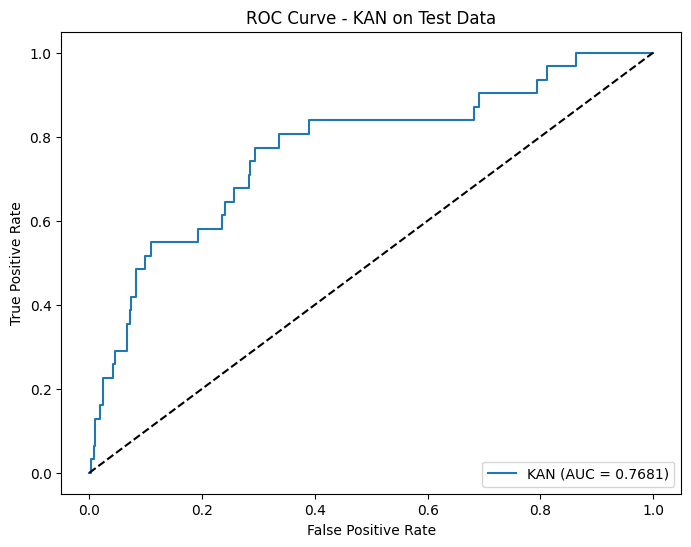

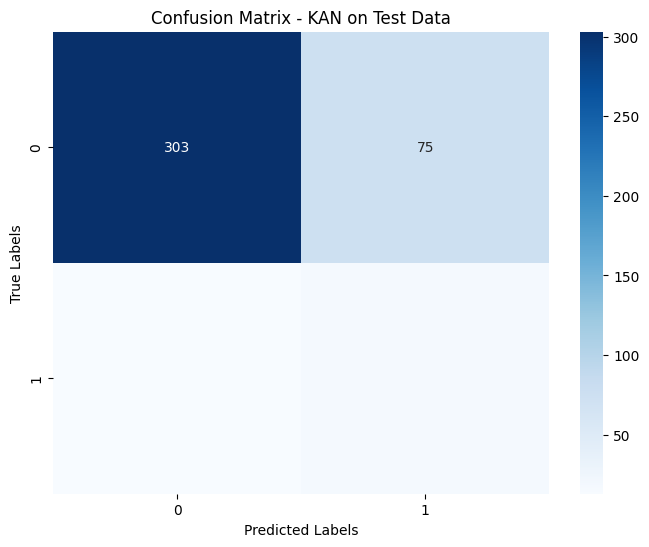

In [154]:
def evaluate_model_on_test_data():
    """
    Evaluate the best KAN model on test data and save results.
    """
    # Load the best model
    best_model = KAN(width=[22, 2], grid=params['grid'], k=params['k'])  # Adjust grid and k based on hyperparameter range
    best_model.load_state_dict(torch.load('model_KAN_edge_cases.pth'))
    best_model.eval()
    
    # Prepare test data
    X_test_scaled = scaller.transform(X_test)
    test_input = torch.from_numpy(X_test_scaled).float()
    test_label = torch.from_numpy(y_test).long().squeeze()
    
    # Make predictions
    with torch.no_grad():
        predictions = best_model(test_input).to('cpu').detach().numpy()
    
    # Calculate probabilities and binary predictions
    pred_prob = softmax(predictions, axis=1)[:, 1]
    pred_labels = (pred_prob > 0.5).astype(int)
    
    # Calculate metrics
    test_roc_auc = roc_auc_score(y_test, pred_prob)
    test_f1 = f1_score(y_test, pred_labels)
    test_precision = precision_score(y_test, pred_labels)
    test_recall = recall_score(y_test, pred_labels)
    test_accuracy = accuracy_score(y_test, pred_labels)
    
    # Print results
    print("Test set evaluation results:")
    print(f"ROC AUC: {test_roc_auc:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    
    # Save results to file
    with open('test_results_KAN_edge_cases.txt', 'w') as file:
        file.write(f"Test ROC AUC: {test_roc_auc:.4f}\n")
        file.write(f"Test F1 Score: {test_f1:.4f}\n")
        file.write(f"Test Precision: {test_precision:.4f}\n")
        file.write(f"Test Recall: {test_recall:.4f}\n")
        file.write(f"Test Accuracy: {test_accuracy:.4f}\n")
    
    # Plot ROC curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'KAN (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - KAN on Test Data')
    plt.legend(loc='lower right')
    # plt.savefig('kan_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - KAN on Test Data')
    # plt.savefig('kan_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return test_roc_auc, test_f1, test_precision, test_recall, test_accuracy

# Run the evaluation
test_metrics = evaluate_model_on_test_data()

# KAN + GAN + Edge Cases

In [56]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from scipy.special import softmax
import numpy as np
import torch
import time
import json
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from kan import KAN

def objective(params):
    best_score = -np.inf 
    best_model = None
    scores = [] #roc-auc
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    
    kf = StratifiedKFold(n_splits=10)
    for i, (train_index, test_index) in enumerate(kf.split(X_train_folds, y_train_k_fold)):
        # Assuming your resampling function and data preparation are correct
        # X_resampled, y_resampled = resampled_with_smote(X_train_folds[train_index], y_train_k_fold[train_index], 2, 3)

        not_scaled_X_train_folds = X_train_folds.copy()
        scaller = StandardScaler()
        scaled_X_train_folds = scaller.fit_transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        train = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train['index'] = np.arange(1, len(train) + 1)
        train['target'] = y_train_k_fold[train_index]
        synthesizer = CTGANSynthesizer(metadata, epochs=500)
        synthesizer.fit(train)
        synthetic_data = synthesizer.sample(num_rows=10000)
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
        syntetic_target = minority_synthetic_data['target']

        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_dropped])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target), axis=0)

        dataset = {
            'train_input': torch.from_numpy(X_train).float(),
            'test_input': torch.from_numpy(X_test).float(),
            'train_label': torch.from_numpy(y_train).long().squeeze(),
            'test_label': torch.from_numpy(y_test).long().squeeze()
        }
    
        model = KAN(width=[22, 2], grid=params['grid'] + 3, k=params['k'] + 3)
        model.fit(dataset, 
                  opt="LBFGS", 
                  log=100,
                  steps=params['steps'] + 25,
                  lr=params['lr'],
                  loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor([params['weight_major'], params['weight_minor']])), 
                  lamb_entropy=0,
                  lamb_l1=0
                 )
        pred = model(dataset['test_input']).to('cpu').detach().numpy()
        score = roc_auc_score(y_train_k_fold[test_index], softmax(pred, axis=1)[:, 1])

        # F1 score calculation
        pred_prob = softmax(pred, axis=1)[:, 1]  # Probability of the positive class
        pred_labels = (pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1 based on threshold
        f1 = f1_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        precision = precision_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        recall = recall_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        accuracy = accuracy_score(y_train_k_fold[test_index], pred_labels)
        
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        scores.append(score)

        # Save if this is the best model so far
        if score > best_score:
            best_score = score
            best_model = model.state_dict()  # Save model state
    
    # After all folds are evaluated, save the best model
    if best_model is not None:
        torch.save(best_model, 'model_KAN_GAN_edge_cases.pth')

    # Save metrics to JSON file
    metrics_data = {
        "metrics": {
            "roc_auc": {
                "values": scores,
                "mean": float(np.mean(scores))
            },
            "f1": {
                "values": [float(score) for score in f1_scores],
                "mean": float(np.mean(f1_scores))
            },
            "precision": {
                "values": [float(score) for score in precision_scores],
                "mean": float(np.mean(precision_scores))
            },
            "recall": {
                "values": [float(score) for score in recall_scores],
                "mean": float(np.mean(recall_scores))
            },
            "accuracy": {
                "values": [float(score) for score in accuracy_scores],
                "mean": float(np.mean(accuracy_scores))
            }
        },
        "hyperparameters": params
    }
    
    # Convert NumPy types to Python native types for JSON serialization
    metrics_json = json.dumps(metrics_data, cls=NumpyEncoder, indent=4)
    
    with open('metrics_KAN_GAN_edge_cases.json', 'w') as file:
        file.write(metrics_json)

    time.sleep(10)
    print(np.mean(scores), scores, params)
    time.sleep(10)
    return {'loss': -np.mean(scores), 'status': STATUS_OK}

# Custom JSON encoder to handle NumPy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

space = {
  # 'resamble_neg': hp.choice('resamble_neg', range(2, 16)),
  # 'resamble_pos': hp.choice('resamble_pos', range(4, 16)),
  'grid': hp.choice('grid', range(3, 5)),
  'k': hp.choice('k', range(3, 5)),
  'steps': hp.choice('steps', range(25, 50)),
  'weight_minor': hp.uniform('weight_minor', 1, 2),
  'weight_major': hp.uniform('weight_major', 0, 1),
  'lr': hp.loguniform('lr', -4, -1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Save best hyperparameters to the same JSON file
with open('metrics_KAN_GAN_edge_cases.json', 'r') as file:
    metrics_data = json.load(file)

# Update with best hyperparameters after optimization
metrics_data['best_hyperparameters'] = {k: (int(v) if k in ['grid', 'k', 'steps'] else float(v)) for k, v in best.items()}

with open('metrics_KAN_GAN_edge_cases.json', 'w') as file:
    json.dump(metrics_data, file, indent=4)

#Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", best)

checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [01:05<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:07,  5.20it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:06,  6.14it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.04it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.63it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.94it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.90it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  8.06it/
| train_loss: 3.34e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [02:15<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.45it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.23it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.59it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.64it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  7.37it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  7.27it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  7.07it/
| train_loss: 3.37e-01 | test_loss: 6.65e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [03:24<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.58it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  7.70it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  7.24it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  7.41it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.82it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.38it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.75it/
| train_loss: 3.39e-01 | test_loss: 6.96e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:04,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [04:33<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.19it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:05,  6.83it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:05,  6.37it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:06,  6.09it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:05,  6.24it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:05,  6.24it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:01<00:05,  6.36it/
| train_loss: 3.12e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:01<00:05,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [05:39<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.70it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.56it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.70it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.92it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.94it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.70it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:03,  8.84it/
| train_loss: 3.19e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [06:38<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:04,  8.15it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.70it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.95it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.89it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:03,  9.05it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.47it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:03,  8.59it/
| train_loss: 3.54e-01 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [07:38<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.48it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.26it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.57it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.83it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.97it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.24it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  8.41it/
| train_loss: 3.32e-01 | test_loss: 4.87e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [08:38<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.47it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.33it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.64it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.90it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.88it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.58it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:03,  8.75it/
| train_loss: 3.40e-01 | test_loss: 4.36e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [09:46<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.42it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.21it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.50it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.70it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.83it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.28it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:04,  8.33it/
| train_loss: 3.31e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [10:51<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/41 [00:00<?, ?it/s]
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   0%|       | 0/41 [00:00<?, ?it/s]
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   2%| | 1/41 [00:00<00:05,  7.38it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   5%| | 2/41 [00:00<00:04,  8.13it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :   7%| | 3/41 [00:00<00:04,  8.48it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  10%| | 4/41 [00:00<00:04,  8.53it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  12%|1| 5/41 [00:00<00:04,  8.66it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  15%|1| 6/41 [00:00<00:04,  8.36it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  17%|1| 7/41 [00:00<00:03,  8.57it/
| train_loss: 3.28e-01 | test_loss: 4.81e-01 | reg: 0.00e+00 | :  20%|1| 8/41 [00:00<00:03,

saving model version 0.1                              
0.8161375880510899                                    
[0.6282894736842105, 0.7247336596602361, 0.6596602361071121, 0.6798157212784336, 0.6515980420385834, 0.8263094521372667, 1.0, 1.0, 1.0, 0.9909692956050572]
{'grid': 3, 'k': 3, 'lr': 0.19863669750338828, 'steps': 41, 'weight_major': 0.027161158543651975, 'weight_minor': 1.1649158468274408}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [12:18<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:08,  4.93it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:08,  4.86it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:08,  4.85it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:07,  5.12it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:07,  5.09it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:08,  4.69it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:07,  5.13it/
| train_loss: 4.65e-01 | test_loss: 8.57e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [13:29<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:07,  5.54it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:07,  5.93it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:06,  6.11it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:06,  5.83it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:06,  5.65it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:07,  5.22it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:06,  5.30it/
| train_loss: 4.39e-01 | test_loss: 7.68e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [14:40<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:08,  5.14it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:09,  4.55it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:08,  4.69it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:08,  4.77it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:01<00:08,  4.60it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:08,  4.45it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:08,  4.48it/
| train_loss: 4.62e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [15:50<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:07,  5.46it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:07,  5.84it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:08,  4.81it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:08,  4.84it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:07,  5.33it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:06,  5.47it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:06,  5.88it/
| train_loss: 4.59e-01 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [16:52<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:08,  5.01it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:07,  5.56it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:07,  5.56it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:07,  5.60it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:06,  5.77it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:06,  5.65it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:06,  5.90it/
| train_loss: 4.61e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [17:59<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:09,  4.49it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:08,  4.68it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:08,  4.93it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:08,  4.88it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:01<00:08,  4.84it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:08,  4.54it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:08,  4.54it/
| train_loss: 4.64e-01 | test_loss: 7.10e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [19:12<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:07,  5.46it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:06,  6.01it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:06,  6.18it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:07,  5.62it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:06,  5.66it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:07,  5.08it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:07,  4.97it/
| train_loss: 4.86e-01 | test_loss: 5.32e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [20:23<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:09,  4.51it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:08,  4.74it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:08,  4.80it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:07,  5.27it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:07,  5.53it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:08,  4.75it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:07,  4.87it/
| train_loss: 4.87e-01 | test_loss: 5.54e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [21:35<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:08,  5.34it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:08,  5.05it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:07,  5.18it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:07,  5.11it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:00<00:07,  4.97it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:07,  4.84it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:07,  4.84it/
| train_loss: 4.80e-01 | test_loss: 5.42e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [22:46<1:41:30, 676.70s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/44 [00:00<?, ?it/s]
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :   0%|       | 0/44 [00:00<?, ?it/s]
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :   2%| | 1/44 [00:00<00:10,  4.18it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :   5%| | 2/44 [00:00<00:09,  4.58it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :   7%| | 3/44 [00:00<00:10,  3.96it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :   9%| | 4/44 [00:00<00:09,  4.27it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :  11%|1| 5/44 [00:01<00:08,  4.64it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :  14%|1| 6/44 [00:01<00:08,  4.55it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :  16%|1| 7/44 [00:01<00:07,  4.69it/
| train_loss: 4.80e-01 | test_loss: 6.28e-01 | reg: 0.00e+00 | :  18%|1| 8/44 [00:01<00:07,

saving model version 0.1                                                            
0.8129061836560094                                                                  
[0.6252990430622009, 0.7362510797581341, 0.6432479124676073, 0.6711776562050101, 0.6579326230924274, 0.8040337146297412, 1.0, 1.0, 1.0, 0.991119807344973]
{'grid': 4, 'k': 4, 'lr': 0.29285084125673555, 'steps': 44, 'weight_major': 0.18709939057850433, 'weight_minor': 1.3869293550778772}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [24:15<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:07,  5.75it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:08,  5.01it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:08,  4.76it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:08,  5.07it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:01<00:09,  4.41it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:08,  4.49it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:07,  4.89it/
| train_loss: 5.14e-01 | test_loss: 7.84e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [25:31<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:07,  5.84it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.90it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.52it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:06,  6.42it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:06,  6.05it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:07,  5.45it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:07,  5.21it/
| train_loss: 5.02e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [26:48<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.90it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.90it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:07,  5.91it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:07,  5.70it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:06,  5.88it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:06,  5.57it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:06,  6.17it/
| train_loss: 5.14e-01 | test_loss: 7.61e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [28:03<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.55it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.42it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:07,  5.79it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:06,  6.41it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:06,  6.11it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:06,  6.00it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:05,  6.54it/
| train_loss: 5.08e-01 | test_loss: 7.65e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [29:17<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.28it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  7.03it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.16it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:06,  6.05it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:07,  5.52it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:06,  5.64it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:06,  6.10it/
| train_loss: 5.14e-01 | test_loss: 7.67e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [30:31<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.07it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.58it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.74it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.82it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.08it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.57it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:06,  6.00it/
| train_loss: 5.41e-01 | test_loss: 6.46e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [31:46<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:12,  3.66it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:10,  4.17it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:08,  4.83it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:08,  5.01it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:07,  5.64it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:06,  5.74it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:06,  6.07it/
| train_loss: 5.66e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [33:04<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:09,  4.65it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.87it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:07,  5.96it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:07,  5.61it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:06,  5.79it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:06,  5.67it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:07,  5.40it/
| train_loss: 5.36e-01 | test_loss: 4.89e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [34:19<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:08,  5.38it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:08,  4.82it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:08,  5.21it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:07,  5.22it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:07,  5.26it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:07,  4.91it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:07,  5.29it/
| train_loss: 5.29e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 20%|██        | 2/10 [35:31<1:33:29, 701.15s/trial, best loss: -0.8161375880510899]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.65it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.56it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.50it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  6.90it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:08,  4.97it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:07,  5.09it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:07,  5.05it/
| train_loss: 5.44e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:07,

saving model version 0.1                                                            
0.8216947088062799                                                                  
[0.6342703349282297, 0.7765620501007774, 0.6838468183126979, 0.6510221710336884, 0.6259717823207601, 0.8524984948826009, 1.0, 1.0, 1.0, 0.9927754364840458]
{'grid': 3, 'k': 3, 'lr': 0.06445516393631516, 'steps': 45, 'weight_major': 0.5249022044248942, 'weight_minor': 1.5373000573814672}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [37:07<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:09,  4.67it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:08,  5.05it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.89it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  6.01it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:07,  5.63it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:06,  6.27it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.34it/
| train_loss: 5.17e-01 | test_loss: 6.85e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [38:23<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.34it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  6.08it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.84it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.86it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.14it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.54it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.50it/
| train_loss: 4.86e-01 | test_loss: 6.51e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [39:35<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:06,  6.62it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:06,  7.47it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:06,  6.61it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.92it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.29it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:06,  5.93it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  5.92it/
| train_loss: 4.97e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [40:48<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.42it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  5.77it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.55it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.76it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:07,  5.94it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.40it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  5.99it/
| train_loss: 5.03e-01 | test_loss: 6.79e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [42:05<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:06,  6.66it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:06,  7.46it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:06,  6.55it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.70it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.44it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:06,  6.03it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.14it/
| train_loss: 5.38e-01 | test_loss: 6.86e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [43:21<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:14,  3.07it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:10,  4.38it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.56it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.27it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.03it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.63it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.14it/
| train_loss: 5.11e-01 | test_loss: 5.67e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [44:31<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.37it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:08,  5.21it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  6.26it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.78it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:05,  7.12it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:05,  7.02it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:05,  7.38it/
| train_loss: 5.04e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [45:49<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:06,  6.80it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  5.72it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.96it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  6.11it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:07,  5.75it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.32it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:08,  4.98it/
| train_loss: 5.21e-01 | test_loss: 3.95e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [47:05<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:13,  3.50it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:09,  4.68it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:09,  4.88it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:08,  5.24it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:01<00:08,  5.24it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.30it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.01it/
| train_loss: 5.20e-01 | test_loss: 3.94e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [48:19<1:25:10, 730.06s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:07,  6.21it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:06,  6.92it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:09,  4.77it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.39it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:07,  5.72it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.79it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  5.93it/
| train_loss: 5.34e-01 | test_loss: 5.24e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
0.8161984471459254                                                                  
[0.6510167464114832, 0.7598617909588252, 0.6230924272962857, 0.662827526634034, 0.6268355888281025, 0.8467790487658038, 1.0, 1.0, 1.0, 0.99157134256472]
{'grid': 4, 'k': 3, 'lr': 0.14434778482395585, 'steps': 47, 'weight_major': 0.643282516002705, 'weight_minor': 1.0023938798460448}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [49:56<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:13,  2.69it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:10,  3.15it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:09,  3.39it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:09,  3.30it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:07,  3.93it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:07,  4.14it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:06,  4.25it/
| train_loss: 5.10e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [51:12<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:07,  4.76it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:07,  4.74it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:07,  4.70it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:07,  4.06it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:07,  3.92it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:08,  3.74it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:07,  4.06it/
| train_loss: 4.97e-01 | test_loss: 7.74e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [52:30<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:08,  4.16it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:07,  4.44it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:07,  4.62it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:06,  4.74it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:06,  4.64it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:06,  4.51it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:06,  4.59it/
| train_loss: 4.86e-01 | test_loss: 8.06e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [53:36<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:07,  4.42it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:07,  4.72it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:07,  4.67it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:00<00:06,  5.10it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:06,  5.09it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:06,  4.74it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:05,  4.99it/
| train_loss: 4.91e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [54:46<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:10,  3.46it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:11,  3.08it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:01<00:11,  2.83it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:10,  3.03it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:09,  3.20it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:09,  3.15it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:02<00:09,  3.22it/
| train_loss: 4.85e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [56:05<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:12,  2.84it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:11,  2.87it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:10,  3.10it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:10,  3.19it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:08,  3.57it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:07,  3.78it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:07,  3.89it/
| train_loss: 5.22e-01 | test_loss: 6.90e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [57:32<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:08,  4.04it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:08,  4.17it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:08,  3.83it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:10,  2.99it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:10,  3.01it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:08,  3.39it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:07,  3.84it/
| train_loss: 5.17e-01 | test_loss: 5.25e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [59:00<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:09,  3.54it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:10,  3.34it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:09,  3.54it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:07,  4.19it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:06,  4.54it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:07,  3.95it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:07,  4.05it/
| train_loss: 5.20e-01 | test_loss: 4.80e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                              
 40%|████      | 4/10 [1:00:25<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:08,  4.03it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:08,  3.93it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:08,  3.69it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:10,  3.17it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:09,  3.24it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:08,  3.61it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:01<00:08,  3.52it/
| train_loss: 5.26e-01 | test_loss: 5.16e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:08,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:01:45<1:14:31, 745.23s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/36 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :   0%|       | 0/36 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :   3%| | 1/36 [00:00<00:11,  2.98it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :   6%| | 2/36 [00:00<00:09,  3.67it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :   8%| | 3/36 [00:00<00:08,  3.78it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :  11%|1| 4/36 [00:01<00:09,  3.40it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :  14%|1| 5/36 [00:01<00:09,  3.29it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :  17%|1| 6/36 [00:01<00:10,  2.96it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :  19%|1| 7/36 [00:02<00:10,  2.89it/
| train_loss: 5.23e-01 | test_loss: 5.91e-01 | reg: 0.00e+00 | :  22%|2| 8/36 [00:02<00:09,

saving model version 0.1                                                              
0.8194911583824362                                                                    
[0.6671650717703349, 0.704290238986467, 0.665418946156061, 0.6590843651022172, 0.6919090123812266, 0.814569536423841, 1.0, 1.0, 1.0, 0.9924744130042144]
{'grid': 4, 'k': 4, 'lr': 0.0786575293540161, 'steps': 36, 'weight_major': 0.39215450906664684, 'weight_minor': 1.5608014044388856}
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:03:33<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:04,  6.26it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:05,  5.33it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:07,  3.92it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:06,  4.04it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:01<00:06,  4.32it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:05,  4.94it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:05,  4.91it/
| train_loss: 4.87e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:05,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:04:57<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:12,  2.54it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:10,  2.91it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:08,  3.32it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:01<00:07,  3.54it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:01<00:06,  4.03it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:05,  4.57it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:04,  5.12it/
| train_loss: 5.02e-01 | test_loss: 6.40e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:06:20<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:08,  3.62it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:07,  3.82it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:07,  3.99it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:01<00:06,  4.06it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:01<00:06,  4.12it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:05,  4.63it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:05,  4.45it/
| train_loss: 4.81e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:07:35<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:04,  6.58it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:04,  6.50it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:04,  6.48it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  6.47it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  6.57it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:00<00:03,  6.51it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:03,  6.55it/
| train_loss: 4.97e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:03,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:08:37<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:04,  6.27it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:04,  6.31it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:04,  6.31it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  6.17it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  6.44it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:00<00:04,  6.20it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:04,  6.17it/
| train_loss: 4.79e-01 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:09:39<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:05,  5.78it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:04,  6.44it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:05,  5.73it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  6.01it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  6.39it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:00<00:04,  6.22it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:03,  6.49it/
| train_loss: 4.87e-01 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:03,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:10:40<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:05,  5.23it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:05,  5.73it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:05,  5.61it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:05,  5.28it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  5.65it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:04,  5.85it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:04,  5.90it/
| train_loss: 5.22e-01 | test_loss: 3.72e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:11:41<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:07,  4.11it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:06,  4.96it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:05,  5.79it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  5.84it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  5.91it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:04,  6.15it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:04,  6.22it/
| train_loss: 5.28e-01 | test_loss: 3.83e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:03,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:12:41<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:06,  4.88it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:05,  5.41it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:04,  6.03it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  5.79it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:04,  5.86it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:01<00:04,  5.82it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:04,  5.70it/
| train_loss: 5.06e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 50%|█████     | 5/10 [1:13:38<1:04:01, 768.20s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/32 [00:00<?, ?it/s]
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :   0%|       | 0/32 [00:00<?, ?it/s]
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :   3%| | 1/32 [00:00<00:05,  5.98it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :   6%| | 2/32 [00:00<00:04,  6.22it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :   9%| | 3/32 [00:00<00:04,  6.82it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :  12%|1| 4/32 [00:00<00:04,  6.93it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :  16%|1| 5/32 [00:00<00:03,  7.20it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :  19%|1| 6/32 [00:00<00:03,  7.00it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :  22%|2| 7/32 [00:01<00:03,  7.19it/
| train_loss: 5.10e-01 | test_loss: 5.14e-01 | reg: 0.00e+00 | :  25%|2| 8/32 [00:01<00:03,

saving model version 0.1                                                              
0.8115864333470642                                                                    
[0.6408492822966507, 0.6976677224301757, 0.6576446875899798, 0.6539015260581629, 0.6331701698819464, 0.8413606261288381, 1.0, 1.0, 1.0, 0.9912703190848886]
{'grid': 4, 'k': 3, 'lr': 0.05568807650167618, 'steps': 32, 'weight_major': 0.8299691860843798, 'weight_minor': 1.006520436591491}
checkpoint directory created: ./model                                                 
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:14:59<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  5.34it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:06,  6.08it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  6.27it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:05,  6.31it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:05,  6.41it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:05,  6.25it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:05,  6.35it/
| train_loss: 5.20e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:15:59<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:06,  5.80it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:06,  6.28it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:05,  6.34it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:05,  6.39it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:05,  6.46it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:00<00:05,  6.14it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:05,  6.16it/
| train_loss: 5.03e-01 | test_loss: 7.09e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:16:59<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  5.52it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:06,  5.85it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:06,  5.98it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:06,  5.29it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:06,  5.61it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:06,  5.63it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:05,  5.75it/
| train_loss: 5.27e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:18:09<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  5.17it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:08,  4.58it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:08,  4.34it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:08,  4.32it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:01<00:08,  4.02it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:08,  4.01it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:08,  4.02it/
| train_loss: 5.04e-01 | test_loss: 7.77e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:07,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:19:18<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  4.89it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:06,  5.54it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:06,  5.83it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:06,  5.45it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:06,  5.19it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:06,  5.06it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:06,  5.00it/
| train_loss: 5.17e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:20:31<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:08,  4.72it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:07,  4.95it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:07,  5.14it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:08,  4.36it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:01<00:07,  4.83it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:07,  4.84it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:06,  5.30it/
| train_loss: 5.23e-01 | test_loss: 6.54e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:21:42<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:07,  4.92it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:07,  4.93it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:07,  4.99it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:07,  4.88it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:01<00:07,  4.99it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:07,  4.71it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:06,  5.09it/
| train_loss: 5.62e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:23:02<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:08,  4.51it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:09,  4.21it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:08,  4.47it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:07,  4.77it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:01<00:07,  4.98it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:07,  4.58it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:06,  4.85it/
| train_loss: 5.37e-01 | test_loss: 4.86e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:24:16<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:17,  2.21it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:13,  2.73it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:01<00:12,  3.00it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:01<00:10,  3.58it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:01<00:11,  3.12it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:11,  3.01it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:02<00:10,  3.09it/
| train_loss: 5.22e-01 | test_loss: 4.57e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:02<00:09,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 60%|██████    | 6/10 [1:25:24<49:49, 747.31s/trial, best loss: -0.8216947088062799]

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   0%|       | 0/40 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   2%| | 1/40 [00:00<00:08,  4.75it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   5%| | 2/40 [00:00<00:07,  5.15it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :   8%| | 3/40 [00:00<00:07,  5.15it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  10%|1| 4/40 [00:00<00:07,  4.99it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  12%|1| 5/40 [00:00<00:06,  5.02it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  15%|1| 6/40 [00:01<00:07,  4.57it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  18%|1| 7/40 [00:01<00:06,  4.77it/
| train_loss: 5.24e-01 | test_loss: 5.98e-01 | reg: 0.00e+00 | :  20%|2| 8/40 [00:01<00:06,

saving model version 0.1                                                            
0.8254026447358088                                                                  
[0.6716507177033493, 0.7826086956521738, 0.6104232651885977, 0.6939245608983589, 0.6769363662539591, 0.8269114990969296, 1.0, 1.0, 1.0, 0.99157134256472]
{'grid': 3, 'k': 4, 'lr': 0.09563827173597679, 'steps': 40, 'weight_major': 0.6141449445300213, 'weight_minor': 1.83377590681764}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:26:54<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:07,  4.55it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:06,  4.90it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:06,  4.77it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.04it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  5.22it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  5.38it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.61it/
| train_loss: 3.64e-01 | test_loss: 7.59e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:28:01<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:07,  4.55it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:06,  4.66it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:06,  4.61it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:06,  4.68it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:06,  4.66it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:06,  4.07it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:05,  4.40it/
| train_loss: 3.63e-01 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:29:07<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  4.85it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:06,  5.10it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.49it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.52it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  5.70it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:04,  5.62it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.26it/
| train_loss: 3.78e-01 | test_loss: 7.37e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:30:14<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  5.17it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.83it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.23it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.04it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  5.22it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  4.82it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:05,  5.01it/
| train_loss: 3.70e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:31:23<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.41it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  6.04it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.50it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.50it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.42it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  4.89it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:06,  4.27it/
| train_loss: 3.58e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:32:31<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:07,  4.09it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.23it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.08it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:06,  4.56it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:05,  4.85it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  4.91it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.22it/
| train_loss: 3.80e-01 | test_loss: 6.50e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:33:42<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  4.98it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.48it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.71it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  5.87it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  5.94it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:04,  5.75it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.38it/
| train_loss: 3.89e-01 | test_loss: 5.60e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:34:54<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.47it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.65it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:06,  4.74it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:06,  4.59it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:06,  4.64it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  4.57it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:05,  5.03it/
| train_loss: 3.94e-01 | test_loss: 5.68e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:36:03<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.61it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  6.05it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.05it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:05,  5.09it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:05,  4.74it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:05,  5.05it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:05,  5.10it/
| train_loss: 3.83e-01 | test_loss: 5.33e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 70%|███████   | 7/10 [1:37:13<36:45, 735.12s/trial, best loss: -0.8254026447358088]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.61it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.29it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:05,  5.32it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  5.87it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.05it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:04,  5.97it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.21it/
| train_loss: 3.83e-01 | test_loss: 5.78e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:05,

saving model version 0.1                                                            
0.8263202927711657                                                                  
[0.6970693779904307, 0.7143679815721279, 0.659660236107112, 0.676936366253959, 0.6861503023322775, 0.8380493678506924, 1.0, 1.0, 1.0, 0.9909692956050572]
{'grid': 4, 'k': 4, 'lr': 0.3184545618887773, 'steps': 33, 'weight_major': 0.09244885232136757, 'weight_minor': 1.8968504545776925}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:38:44<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:05,  4.90it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  5.05it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:04,  5.67it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.49it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  6.05it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:03,  6.18it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:03,  6.09it/
| train_loss: 5.26e-01 | test_loss: 8.10e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:39:53<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  6.14it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  5.23it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:04,  5.27it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.21it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:04,  5.34it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.99it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.45it/
| train_loss: 4.86e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:41:05<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:05,  5.02it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  6.13it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:03,  6.72it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.74it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  5.53it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:03,  5.35it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:03,  5.29it/
| train_loss: 4.93e-01 | test_loss: 7.87e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:42:14<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:05,  4.94it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  5.79it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:03,  6.32it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:03,  6.61it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  6.35it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:00<00:03,  6.39it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:03,  6.50it/
| train_loss: 5.24e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:02,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:43:26<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:07,  3.44it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:06,  4.13it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:05,  4.27it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:06,  3.80it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:01<00:05,  3.87it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.56it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.47it/
| train_loss: 5.27e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:44:37<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  5.51it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:03,  6.43it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:03,  6.82it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:03,  6.85it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:04,  4.83it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.68it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.76it/
| train_loss: 5.41e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:45:47<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:03,  6.76it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  5.82it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:04,  4.85it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.08it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:04,  4.95it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.85it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.89it/
| train_loss: 5.58e-01 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:47:01<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  6.10it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:05,  4.86it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:04,  5.81it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:03,  6.43it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  6.45it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:00<00:03,  6.37it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:02,  6.70it/
| train_loss: 5.34e-01 | test_loss: 5.85e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:02,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:48:15<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  6.46it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:03,  6.67it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:03,  6.52it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:03,  5.99it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:04,  5.46it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.21it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.40it/
| train_loss: 5.53e-01 | test_loss: 5.80e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 80%|████████  | 8/10 [1:49:26<24:12, 726.33s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:05,  5.09it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:05,  4.27it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:05,  4.33it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.22it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  5.84it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:03,  5.81it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:03,  6.21it/
| train_loss: 5.53e-01 | test_loss: 6.48e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:02,

saving model version 0.1                                                            
0.8132677820837989                                                                  
[0.5723684210526315, 0.7253095306651309, 0.62712352433055, 0.689029657356752, 0.6582205585948747, 0.8696568332329923, 1.0, 1.0, 1.0, 0.9909692956050572]
{'grid': 4, 'k': 3, 'lr': 0.03112673532974167, 'steps': 27, 'weight_major': 0.328284608420196, 'weight_minor': 1.299097376168075}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:50:54<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.25it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  5.88it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  6.20it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.29it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.45it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:06,  6.39it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.50it/
| train_loss: 5.06e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:52:07<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:10,  4.34it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:08,  5.52it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:08,  5.31it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.86it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.26it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:06,  5.97it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.35it/
| train_loss: 4.91e-01 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:53:21<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:10,  4.32it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:08,  5.46it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.83it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.73it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.14it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.58it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.24it/
| train_loss: 4.82e-01 | test_loss: 8.40e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:54:33<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:10,  4.46it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:08,  5.49it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  5.94it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.22it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:08,  5.19it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:09,  4.24it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:08,  4.58it/
| train_loss: 4.97e-01 | test_loss: 7.95e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:55:44<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.46it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  6.31it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:06,  6.63it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.90it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:05,  7.07it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:07,  5.51it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.04it/
| train_loss: 5.30e-01 | test_loss: 8.00e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:56:56<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.43it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  6.25it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:06,  6.62it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.80it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.96it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:06,  6.56it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  6.46it/
| train_loss: 5.09e-01 | test_loss: 7.05e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:58:02<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:09,  4.70it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  5.87it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  6.09it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:07,  5.89it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.44it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.39it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.56it/
| train_loss: 4.99e-01 | test_loss: 5.55e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [1:59:09<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:13,  3.36it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:10,  4.12it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:10,  4.06it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:08,  4.96it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:01<00:07,  5.55it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.31it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.03it/
| train_loss: 5.01e-01 | test_loss: 5.21e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [2:00:21<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:09,  4.99it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  5.91it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  6.12it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.32it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.54it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:01<00:07,  5.58it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:07,  5.68it/
| train_loss: 5.02e-01 | test_loss: 5.40e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 90%|█████████ | 9/10 [2:01:32<12:07, 727.46s/trial, best loss: -0.8263202927711657]

description:   0%|                                                           | 0/47 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   0%|       | 0/47 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   2%| | 1/47 [00:00<00:08,  5.35it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   4%| | 2/47 [00:00<00:07,  6.13it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   6%| | 3/47 [00:00<00:07,  6.18it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :   9%| | 4/47 [00:00<00:06,  6.32it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  11%|1| 5/47 [00:00<00:06,  6.58it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  13%|1| 6/47 [00:00<00:06,  6.06it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  15%|1| 7/47 [00:01<00:06,  5.91it/
| train_loss: 5.27e-01 | test_loss: 6.39e-01 | reg: 0.00e+00 | :  17%|1| 8/47 [00:01<00:06,

saving model version 0.1                                                            
0.8161438737244389                                                                  
[0.6049641148325359, 0.7742585660811977, 0.6403685574431327, 0.6659948171609559, 0.6372012669162108, 0.8467790487658038, 1.0, 1.0, 1.0, 0.9918723660445515]
{'grid': 3, 'k': 4, 'lr': 0.13996655578143377, 'steps': 47, 'weight_major': 0.31820713637240927, 'weight_minor': 1.7234966302976558}
100%|██████████| 10/10 [2:02:01<00:00, 732.14s/trial, best loss: -0.8263202927711657]
Лучшие гиперпараметры: {'grid': 1, 'k': 1, 'lr': 0.3184545618887773, 'steps': 8, 'weight_major': 0.09244885232136757, 'weight_minor': 1.8968504545776925}


In [ ]:
# Process data with appropriate scaling
not_scaled_X_test = X_test.copy()
not_scaled_X_train_folds = X_train_folds.copy()
scaller = StandardScaler()

# First, process the training data
X_train_processed = scaller.fit_transform(not_scaled_X_train_folds)

# Now transform test data using the same scaler
X_test_processed = scaller.transform(not_scaled_X_test)

# Create DataFrame with index for CTGAN - using TRAINING data
train_df = not_scaled_X_train_folds.copy().reset_index(drop=True)
train_df['index'] = np.arange(1, len(train_df) + 1)
train_df['target'] = y_train_k_fold

# Generate synthetic data from TRAINING data
synthesizer = CTGANSynthesizer(metadata, epochs=500)
synthesizer.fit(train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
    
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for TRAINING
X_train_combined = pd.concat([not_scaled_X_train_folds, syntetic_minority_dropped])
X_train_processed_combined = scaller.transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Create dataset dictionary for KAN model - ensure all tensors are float32
dataset = {
    'train_input': torch.tensor(X_train_processed_combined, dtype=torch.float32),
    'train_label': torch.tensor(y_train_combined, dtype=torch.long).squeeze(),
    'test_input': torch.tensor(X_test_processed, dtype=torch.float32),
    'test_label': torch.tensor(y_test, dtype=torch.long).squeeze()
}

# Make sure weight tensor is also float32
weight_tensor = torch.tensor([best['weight_major'], best['weight_minor']], dtype=torch.float32)

# Train model with best parameters
model = KAN(width=[22, 2], grid=best['grid'] + 3, k=best['k'] + 3)
model.fit(dataset, 
          opt="LBFGS", 
          log=100,
          steps=best['steps'] + 25,
          lr=best['lr'],
          loss_fn=torch.nn.CrossEntropyLoss(weight=weight_tensor), 
          lamb_entropy=0,
          lamb_l1=0)

# Make predictions on test data (using the predict method directly on the model)
test_pred = model(dataset['test_input']).to('cpu').detach().numpy()
test_predictions_proba = softmax(test_pred, axis=1)[:, 1]  # Probability of positive class
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

# Calculate metrics with original test data
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the updated metrics
with open('test_scores_KAN_GAN_edge_cases.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("Test metrics added to saved results.")

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.99e-01 | test_loss: 7.76e-01 | reg: 0.00e+00 | : 100%|█| 8/8 [00:00<00:00, 12.80it/s

saving model version 0.1

Test Set Performance:
ROC AUC: 0.8006
F1 Score: 0.1908
Precision: 0.1062
Recall: 0.9355
Accuracy: 0.3985
Test metrics added to saved results.


# KAN + ARF + edge cases

In [55]:
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from scipy.special import softmax
import numpy as np
import torch
import time
import json
from kan import KAN

def objective(params):
    best_score = -np.inf 
    best_model = None
    scores = [] #roc-auc
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    
    kf = StratifiedKFold(n_splits=10)
    for i, (train_index, test_index) in enumerate(kf.split(X_train_folds, y_train_k_fold)):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaller = StandardScaler()
        scaled_X_train_folds = scaller.fit_transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        train = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train['index'] = np.arange(1, len(train) + 1)
        train['target'] = y_train_k_fold[train_index]
        loader = GenericDataLoader(
          train_df,
          target_column="target",
        )

        syn_model = Plugins().get("arf")
        syn_model.fit(loader)

        synthetic_data = syn_model.generate(count=10000)
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
        syntetic_target = minority_synthetic_data['target']

        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_dropped])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target), axis=0)

        dataset = {
            'train_input': torch.from_numpy(X_train).float(),
            'test_input': torch.from_numpy(X_test).float(),
            'train_label': torch.from_numpy(y_train).long().squeeze(),
            'test_label': torch.from_numpy(y_test).long().squeeze()
        }
    
        model = KAN(width=[22, 2], grid=params['grid'] + 3, k=params['k'] + 3)
        model.fit(dataset, 
                  opt="LBFGS", 
                  log=100,
                  steps=params['steps'] + 25,
                  lr=params['lr'],
                  loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor([params['weight_major'], params['weight_minor']])), 
                  lamb_entropy=0,
                  lamb_l1=0
                 )
        pred = model(dataset['test_input']).to('cpu').detach().numpy()
        score = roc_auc_score(y_train_k_fold[test_index], softmax(pred, axis=1)[:, 1])

        pred_prob = softmax(pred, axis=1)[:, 1]  # Probability of the positive class
        pred_labels = (pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1 based on threshold
        f1 = f1_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        precision = precision_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        recall = recall_score(y_train_k_fold[test_index], pred_labels, zero_division=0)
        accuracy = accuracy_score(y_train_k_fold[test_index], pred_labels)
        
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_model = model.state_dict()  # Save model state
    
    if best_model is not None:
        torch.save(best_model, 'model_KAN_GAN_edge_cases.pth')

    metrics_data = {
        "metrics": {
            "roc_auc": {
                "values": scores,
                "mean": float(np.mean(scores))
            },
            "f1": {
                "values": [float(score) for score in f1_scores],
                "mean": float(np.mean(f1_scores))
            },
            "precision": {
                "values": [float(score) for score in precision_scores],
                "mean": float(np.mean(precision_scores))
            },
            "recall": {
                "values": [float(score) for score in recall_scores],
                "mean": float(np.mean(recall_scores))
            },
            "accuracy": {
                "values": [float(score) for score in accuracy_scores],
                "mean": float(np.mean(accuracy_scores))
            }
        },
        "hyperparameters": params
    }
    
    metrics_json = json.dumps(metrics_data, cls=NumpyEncoder, indent=4)
    
    with open('metrics_KAN_arf_edge_cases.json', 'w') as file:
        file.write(metrics_json)

    time.sleep(10)
    print(np.mean(scores), scores, params)
    time.sleep(10)
    return {'loss': -np.mean(scores), 'status': STATUS_OK}

# Custom JSON encoder to handle NumPy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

space = {
  # 'resamble_neg': hp.choice('resamble_neg', range(2, 16)),
  # 'resamble_pos': hp.choice('resamble_pos', range(4, 16)),
  'grid': hp.choice('grid', range(3, 5)),
  'k': hp.choice('k', range(3, 5)),
  'steps': hp.choice('steps', range(25, 50)),
  'weight_minor': hp.uniform('weight_minor', 1, 2),
  'weight_major': hp.uniform('weight_major', 0, 1),
  'lr': hp.loguniform('lr', -4, -1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Save best hyperparameters to the same JSON file
with open('metrics_KAN_arf_edge_cases_CV.json', 'r') as file:
    metrics_data = json.load(file)

# Update with best hyperparameters after optimization
metrics_data['best_hyperparameters'] = {k: (int(v) if k in ['grid', 'k', 'steps'] else float(v)) for k, v in best.items()}

with open('metrics_KAN_arf_edge_cases_CV.json', 'w') as file:
    json.dump(metrics_data, file, indent=4)

#Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", best)

In [72]:
# edge_case CV arf KAN best hyperparams
best

{'grid': 0,
 'k': 1,
 'lr': 0.24404116160800637,
 'steps': 21,
 'weight_major': 0.6499011068982565,
 'weight_minor': 1.6962865757275483}

In [73]:
# Process data with appropriate scaling
not_scaled_X_test = X_test.copy()
not_scaled_X_train_folds = X_train_folds.copy()
scaller = StandardScaler()

# First, process the training data
X_train_processed = scaller.fit_transform(not_scaled_X_train_folds)

# Now transform test data using the same scaler
X_test_processed = scaller.transform(not_scaled_X_test)

train_df = not_scaled_X_train_folds.copy().reset_index(drop=True)
train_df['index'] = np.arange(1, len(train_df) + 1)
train_df['target'] = y_train_k_fold

# Generate synthetic data from TRAINING data
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity
syn_model = Plugins().get("arf")
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
    
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for TRAINING
X_train_combined = pd.concat([not_scaled_X_train_folds, syntetic_minority_dropped])
X_train_processed_combined = scaller.transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Create dataset dictionary for KAN model - ensure all tensors are float32
dataset = {
    'train_input': torch.tensor(X_train_processed_combined, dtype=torch.float32),
    'train_label': torch.tensor(y_train_combined, dtype=torch.long).squeeze(),
    'test_input': torch.tensor(X_test_processed, dtype=torch.float32),
    'test_label': torch.tensor(y_test, dtype=torch.long).squeeze()
}

# Make sure weight tensor is also float32
weight_tensor = torch.tensor([best['weight_major'], best['weight_minor']], dtype=torch.float32)

# Train model with best parameters
model = KAN(width=[22, 2], grid=best['grid'] + 3, k=best['k'] + 3)
model.fit(dataset, 
          opt="LBFGS", 
          log=100,
          steps=best['steps'] + 25,
          lr=best['lr'],
          loss_fn=torch.nn.CrossEntropyLoss(weight=weight_tensor), 
          lamb_entropy=0,
          lamb_l1=0)

# Make predictions on test data (using the predict method directly on the model)
test_pred = model(dataset['test_input']).to('cpu').detach().numpy()
test_predictions_proba = softmax(test_pred, axis=1)[:, 1]  # Probability of positive class
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

# Calculate metrics with original test data
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the updated metrics
with open('test_scores_KAN_arf_edge_cases.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("Test metrics added to saved results.")

[2025-05-17T14:21:31.837623+0400][17489][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-17T14:21:31.838357+0400][17489][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-17T14:21:31.838627+0400][17489][CRITICAL] module plugin_great load failed
[2025-05-17T14:21:31.839137+0400][17489][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.6786743515850144
Iteration number 1 reached accuracy of 0.42564841498559075.
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.89e-01 | test_loss: 7.53e-01 | reg: 0.00e+00 | : 100%|█| 46/46 [00:13<00:00,  3.48it

saving model version 0.1

Test Set Performance:
ROC AUC: 0.7960
F1 Score: 0.3217
Precision: 0.2054
Recall: 0.7419
Accuracy: 0.7628
Test metrics added to saved results.


# KAN + ARF

In [53]:
best = {
 'grid': 0,
 'k': 1,
 'lr': 0.24404116160800637,
 'steps': 21,
 'weight_major': 0.6499011068982565,
 'weight_minor': 1.6962865757275483
}

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from scipy.special import softmax
import numpy as np
import torch
import time
import json
from kan import KAN


In [58]:
# Process data with appropriate scaling
not_scaled_X_test = X_test.copy()
not_scaled_X_train_folds = X_train_folds.copy()
scaller = StandardScaler()

# First, process the training data
X_train_processed = scaller.fit_transform(not_scaled_X_train_folds)

# Now transform test data using the same scaler
X_test_processed = scaller.transform(not_scaled_X_test)

train_df = not_scaled_X_train_folds.copy().reset_index(drop=True)
train_df['index'] = np.arange(1, len(train_df) + 1)
train_df['target'] = y_train_k_fold

# Generate synthetic data from TRAINING data
loader = GenericDataLoader(
    train_df,
    target_column="target",
)

# Generate synthetic data using synthcity
syn_model = Plugins().get("arf")
syn_model.fit(loader)

# Generate synthetic samples
synthetic_data = syn_model.generate(count=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
    
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for TRAINING
X_train_combined = pd.concat([not_scaled_X_train_folds, syntetic_minority_dropped])
X_train_processed_combined = scaller.transform(X_train_combined)
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Create dataset dictionary for KAN model - ensure all tensors are float32
dataset = {
    'train_input': torch.tensor(X_train_processed_combined, dtype=torch.float32),
    'train_label': torch.tensor(y_train_combined, dtype=torch.long).squeeze(),
    'test_input': torch.tensor(X_test_processed, dtype=torch.float32),
    'test_label': torch.tensor(y_test, dtype=torch.long).squeeze()
}

# Make sure weight tensor is also float32
weight_tensor = torch.tensor([best['weight_major'], best['weight_minor']], dtype=torch.float32)

# Train model with best parameters
model = KAN(width=[22, 2], grid=best['grid'] + 3, k=best['k'] + 3)
model.fit(dataset, 
          opt="LBFGS", 
          log=100,
          steps=best['steps'] + 25,
          lr=best['lr'],
          loss_fn=torch.nn.CrossEntropyLoss(weight=weight_tensor), 
          lamb_entropy=0,
          lamb_l1=0)

# Make predictions on test data (using the predict method directly on the model)
test_pred = model(dataset['test_input']).to('cpu').detach().numpy()
test_predictions_proba = softmax(test_pred, axis=1)[:, 1]  # Probability of positive class
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

# Calculate metrics with original test data
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the updated metrics
with open('test_scores_KAN_arf.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("Test metrics added to saved results.")

[2025-05-26T19:14:02.052310+0400][27232][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T19:14:02.052771+0400][27232][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T19:14:02.052991+0400][27232][CRITICAL] module plugin_great load failed
[2025-05-26T19:14:02.053248+0400][27232][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.6772334293948127
Iteration number 1 reached accuracy of 0.42881844380403455.
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.93e-01 | test_loss: 7.52e-01 | reg: 0.00e+00 | : 100%|█| 46/46 [00:08<00:00,  5.46it

saving model version 0.1

Test Set Performance:
ROC AUC: 0.7930
F1 Score: 0.3357
Precision: 0.2143
Recall: 0.7742
Accuracy: 0.7677
Test metrics added to saved results.


# KAN + TVAE

In [59]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer


In [62]:
if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using TVAE
synthesizer = TVAESynthesizer(metadata, epochs=500)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaller.fit_transform(X_train_combined)

# Create dataset dictionary for KAN model - ensure all tensors are float32
dataset = {
    'train_input': torch.tensor(X_train_combined_scaled, dtype=torch.float32),
    'train_label': torch.tensor(y_train_combined, dtype=torch.long).squeeze(),
    'test_input': torch.tensor(X_test_processed, dtype=torch.float32),
    'test_label': torch.tensor(y_test, dtype=torch.long).squeeze()
}

# Make sure weight tensor is also float32
weight_tensor = torch.tensor([best['weight_major'], best['weight_minor']], dtype=torch.float32)

# Train model with best parameters
model = KAN(width=[22, 2], grid=best['grid'] + 3, k=best['k'] + 3)
model.fit(dataset, 
          opt="LBFGS", 
          log=100,
          steps=best['steps'] + 25,
          lr=best['lr'],
          loss_fn=torch.nn.CrossEntropyLoss(weight=weight_tensor), 
          lamb_entropy=0,
          lamb_l1=0)

# Make predictions on test data (using the predict method directly on the model)
test_pred = model(dataset['test_input']).to('cpu').detach().numpy()
test_predictions_proba = softmax(test_pred, axis=1)[:, 1]  # Probability of positive class
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

# Calculate metrics with original test data
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the updated metrics
with open('test_scores_KAN_TVAE.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("Test metrics added to saved results.")

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.26e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | : 100%|█| 46/46 [00:08<00:00,  5.12it

saving model version 0.1

Test Set Performance:
ROC AUC: 0.7714
F1 Score: 0.2573
Precision: 0.1571
Recall: 0.7097
Accuracy: 0.6895
Test metrics added to saved results.


# KAN + GAUSSIAN COPULA

In [63]:
if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using TVAE
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaller.fit_transform(X_train_combined)

# Create dataset dictionary for KAN model - ensure all tensors are float32
dataset = {
    'train_input': torch.tensor(X_train_combined_scaled, dtype=torch.float32),
    'train_label': torch.tensor(y_train_combined, dtype=torch.long).squeeze(),
    'test_input': torch.tensor(X_test_processed, dtype=torch.float32),
    'test_label': torch.tensor(y_test, dtype=torch.long).squeeze()
}

# Make sure weight tensor is also float32
weight_tensor = torch.tensor([best['weight_major'], best['weight_minor']], dtype=torch.float32)

# Train model with best parameters
model = KAN(width=[22, 2], grid=best['grid'] + 3, k=best['k'] + 3)
model.fit(dataset, 
          opt="LBFGS", 
          log=100,
          steps=best['steps'] + 25,
          lr=best['lr'],
          loss_fn=torch.nn.CrossEntropyLoss(weight=weight_tensor), 
          lamb_entropy=0,
          lamb_l1=0)

# Make predictions on test data (using the predict method directly on the model)
test_pred = model(dataset['test_input']).to('cpu').detach().numpy()
test_predictions_proba = softmax(test_pred, axis=1)[:, 1]  # Probability of positive class
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

# Calculate metrics with original test data
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the updated metrics
with open('test_scores_KAN_GaussianCopula.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

print("Test metrics added to saved results.")

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.24e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | : 100%|█| 46/46 [00:08<00:00,  5.62it

saving model version 0.1

Test Set Performance:
ROC AUC: 0.7429
F1 Score: 0.2541
Precision: 0.1533
Recall: 0.7419
Accuracy: 0.6699
Test metrics added to saved results.
